In [4]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: C:\Users\pgtar\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: C:\Users\pgtar\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [6]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: C:\Users\pgtar\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [7]:
pip install arff


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: C:\Users\pgtar\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [218]:
import pandas as pd
import arff
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io.arff import loadarff 
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from matplotlib.pyplot import figure
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import homogeneity_score, rand_score, completeness_score, roc_curve

def DrawConfusionMatrix(y_test_data,y_test_data_predicted):
  conf_matrix = confusion_matrix(y_true=y_test_data, y_pred=y_test_data_predicted)
  fig, ax = plt.subplots(figsize=(2.5,2.5))
  ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
  for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
      ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center')

In [56]:
data = loadarff('./speeddating.arff')
df = pd.DataFrame(data[0])

In [57]:
def decode(record):
    try:
        return record.decode('utf-8')
    except:
        return record


df = df.applymap(decode)
columnsToGetRidOf = []

for column in df.columns:
    if (column[0] + column[1] == "d_"):
        columnsToGetRidOf.append(column)

df = df.drop(columns=columnsToGetRidOf)
df.head()

has_null  wave  gender   age  age_o                                   race   
0        0   1.0  female  21.0   27.0  Asian/Pacific Islander/Asian-American  \
1        0   1.0  female  21.0   22.0  Asian/Pacific Islander/Asian-American   
2        1   1.0  female  21.0   22.0  Asian/Pacific Islander/Asian-American   
3        0   1.0  female  21.0   23.0  Asian/Pacific Islander/Asian-American   
4        0   1.0  female  21.0   24.0  Asian/Pacific Islander/Asian-American   

                                  race_o samerace  importance_same_race   
0            European/Caucasian-American        0                   2.0  \
1            European/Caucasian-American        0                   2.0   
2  Asian/Pacific Islander/Asian-American        1                   2.0   
3            European/Caucasian-American        0                   2.0   
4               Latino/Hispanic American        0                   2.0   

   importance_same_religion  ... interests_correlate   
0                       4.0  ...                0.14  \
1                       4.0  ...                0.54   
2                       4.0  ...                0.16   
3                       4.0  ...                0.61   
4                       4.0  ...                0.21   

   expected_happy_with_sd_people  expected_num_interested_in_me   
0                            3.0                            2.0  \
1                            3.0                            2.0   
2                            3.0                            2.0   
3                            3.0                            2.0   
4                            3.0                            2.0   

   expected_num_matches  like  guess_prob_liked  met  decision  decision_o   
0                   4.0   7.0               6.0  0.0         1           0  \
1                   4.0   7.0               5.0  1.0         1           0   
2                   4.0   7.0               NaN  1.0         1           1   
3                   4.0   7.0               6.0  0.0         1           1   
4                   4.0   6.0               6.0  0.0         1           1   

   match  
0      0  
1      0  
2      1  
3      1  
4      1  

[5 rows x 67 columns]

In [58]:
numericColumns = ['wave', 
                 'age', 
                 'age_o',
                 'importance_same_race',
                 'importance_same_religion',
                 'pref_o_attractive',
                 'pref_o_sincere',
                 'pref_o_intelligence',
                 'pref_o_funny',
                 'pref_o_ambitious',
                 'pref_o_shared_interests',
                 'attractive_o',
                 'sinsere_o',
                 'intelligence_o',
                 'funny_o',
                 'ambitous_o',
                 'shared_interests_o',
                 'attractive_important',
                 'sincere_important',
                 'intellicence_important',
                 'funny_important',
                 'ambtition_important',
                 'shared_interests_important',
                 'attractive',
                 'sincere',
                 'intelligence',
                 'funny',
                 'ambition',
                 'attractive_partner',
                 'sincere_partner',
                 'intelligence_partner',
                 'funny_partner',
                 'ambition_partner',
                 'shared_interests_partner',
                 'sports',
                 'tvsports',
                 'exercise',
                 'dining',
                 'museums',
                 'art',
                 'hiking',
                 'gaming',
                 'clubbing',
                 'reading',
                 'tv',
                 'theater',
                 'movies',
                 'concerts',
                 'music',
                 'shopping',
                 'yoga',
                 'interests_correlate',
                 'expected_happy_with_sd_people',
                 'expected_num_interested_in_me',
                 'expected_num_matches',
                 'like',
                 'guess_prob_liked',
                 'met'
                 ]
nonNumericColumns = ['samerace',
                  'decision',
                  'decision_o',
                  'match',
                  'gender', #starts string values
                  'race',
                  'race_o',
                  'field']

df.columns

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
for column in numericColumns:
    imp = imp.fit(df[[column]])
    df[column] = imp.transform(df[[column]])

df = df.drop(columns='has_null')
df.head()


wave  gender   age  age_o                                   race   
0   1.0  female  21.0   27.0  Asian/Pacific Islander/Asian-American  \
1   1.0  female  21.0   22.0  Asian/Pacific Islander/Asian-American   
2   1.0  female  21.0   22.0  Asian/Pacific Islander/Asian-American   
3   1.0  female  21.0   23.0  Asian/Pacific Islander/Asian-American   
4   1.0  female  21.0   24.0  Asian/Pacific Islander/Asian-American   

                                  race_o samerace  importance_same_race   
0            European/Caucasian-American        0                   2.0  \
1            European/Caucasian-American        0                   2.0   
2  Asian/Pacific Islander/Asian-American        1                   2.0   
3            European/Caucasian-American        0                   2.0   
4               Latino/Hispanic American        0                   2.0   

   importance_same_religion field  ...  interests_correlate   
0                       4.0   Law  ...                 0.14  \
1                       4.0   Law  ...                 0.54   
2                       4.0   Law  ...                 0.16   
3                       4.0   Law  ...                 0.61   
4                       4.0   Law  ...                 0.21   

   expected_happy_with_sd_people  expected_num_interested_in_me   
0                            3.0                            2.0  \
1                            3.0                            2.0   
2                            3.0                            2.0   
3                            3.0                            2.0   
4                            3.0                            2.0   

   expected_num_matches  like  guess_prob_liked  met  decision  decision_o   
0                   4.0   7.0          6.000000  0.0         1           0  \
1                   4.0   7.0          5.000000  1.0         1           0   
2                   4.0   7.0          5.207523  1.0         1           1   
3                   4.0   7.0          6.000000  0.0         1           1   
4                   4.0   6.0          6.000000  0.0         1           1   

   match  
0      0  
1      0  
2      1  
3      1  
4      1  

[5 rows x 66 columns]

In [59]:
labelEncoder = LabelEncoder()
df = df.apply(labelEncoder.fit_transform)
df = df.sample(frac = 1)
df

wave  gender  age  age_o  race  race_o  samerace  importance_same_race   
1575     3       1    3     13     3       3         1                     1  \
6884    18       0    6     11     3       3         1                     1   
3360     8       1   13     14     4       2         0                     1   
4893    12       0   12      7     3       4         0                     2   
7199    18       1    6     13     1       2         0                     1   
...    ...     ...  ...    ...   ...     ...       ...                   ...   
1373     3       1    8     11     4       3         0                     3   
6869    17       1   16      8     1       1         1                     1   
3117     8       1    8      4     3       3         1                     1   
2219     6       1   10      6     1       3         0                     1   
445      1       0    8     11     3       3         1                     8   

      importance_same_religion  field  ...  interests_correlate   
1575                         0    183  ...                  122  \
6884                         0    259  ...                   62   
3360                         0    107  ...                  137   
4893                         7    186  ...                  131   
7199                         0     38  ...                   44   
...                        ...    ...  ...                  ...   
1373                         6     47  ...                  103   
6869                         0    132  ...                   40   
3117                         0     24  ...                   74   
2219                         0     16  ...                  100   
445                          8    200  ...                   59   

      expected_happy_with_sd_people  expected_num_interested_in_me   
1575                              6                              3  \
6884                              4                              6   
3360                              4                              6   
4893                              4                              6   
7199                              4                              6   
...                             ...                            ...   
1373                              7                              3   
6869                              4                              6   
3117                              7                              6   
2219                              3                              6   
445                               6                              9   

      expected_num_matches  like  guess_prob_liked  met  decision  decision_o   
1575                     7    11                11    0         1           1  \
6884                     0     6                 6    0         0           1   
3360                     7    11                15    0         0           1   
4893                     0    18                 1    0         0           1   
7199                     4    13                11    0         1           0   
...                    ...   ...               ...  ...       ...         ...   
1373                     9    13                11    0         1           0   
6869                     2     6                 8    0         1           0   
3117                     7    11                11    0         1           0   
2219                     4     8                 4    2         0           0   
445                      0     3                 8    0         0           1   

      match  
1575      1  
6884      0  
3360      0  
4893      0  
7199      0  
...     ...  
1373      0  
6869      0  
3117      0  
2219      0  
445       0  

[8378 rows x 66 columns]

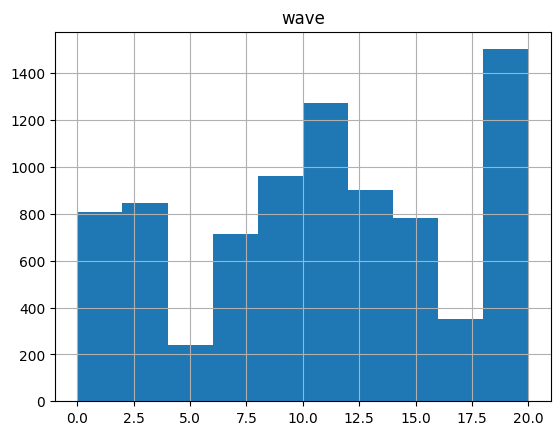

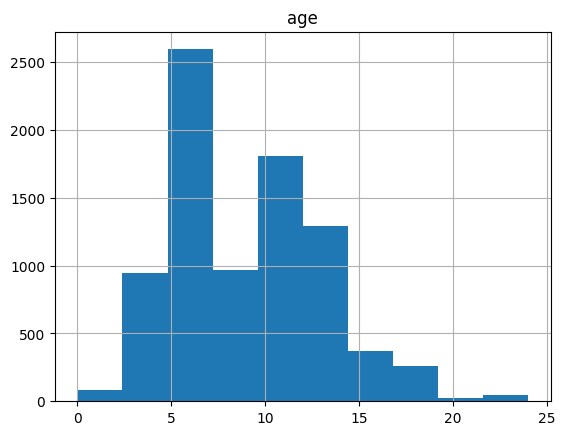

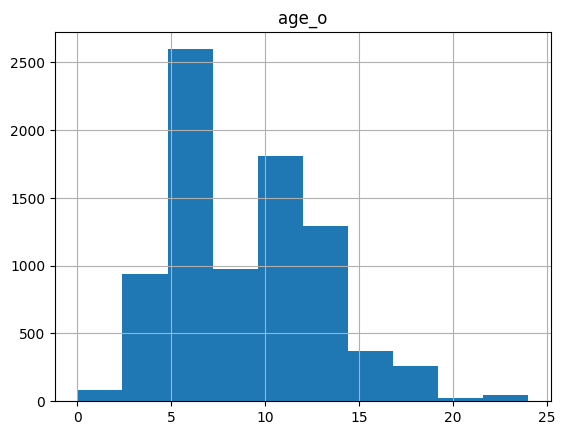

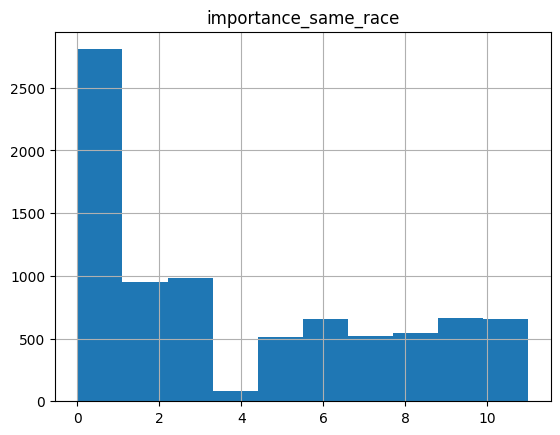

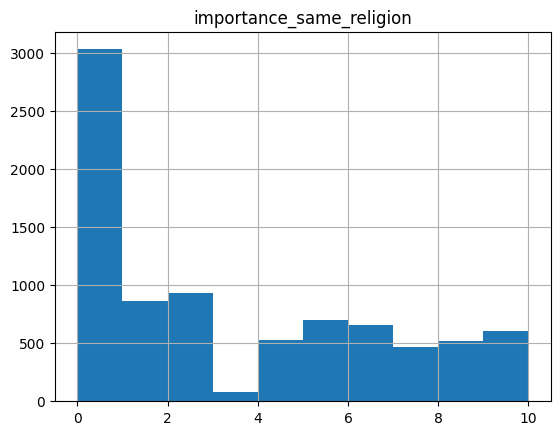

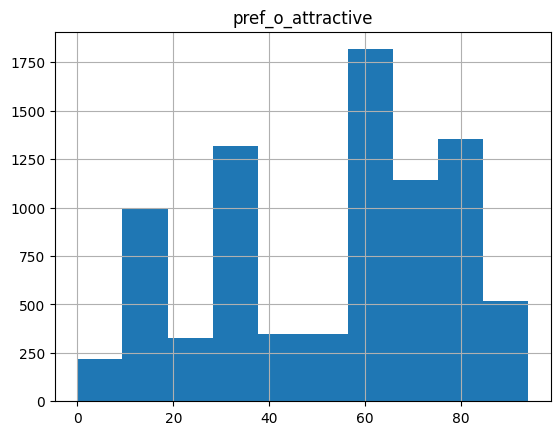

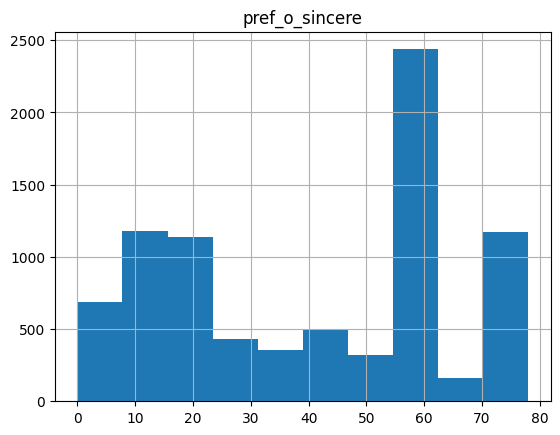

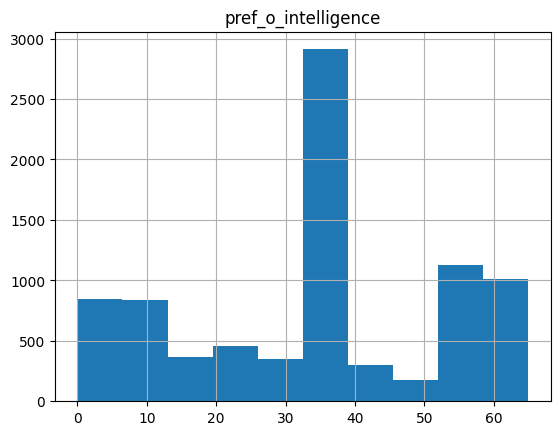

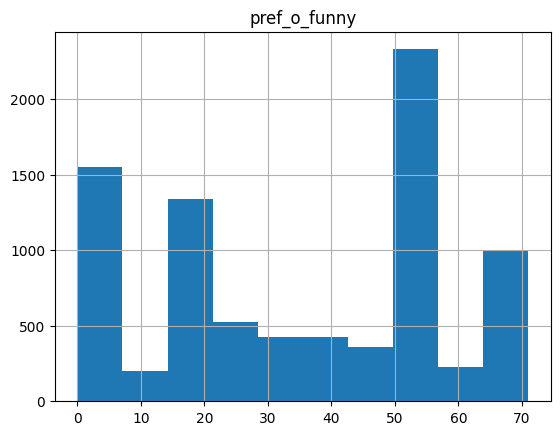

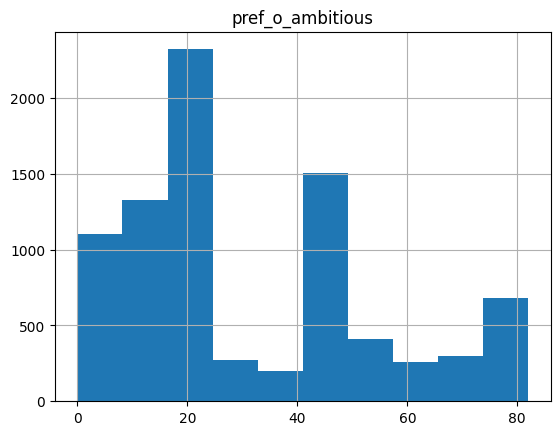

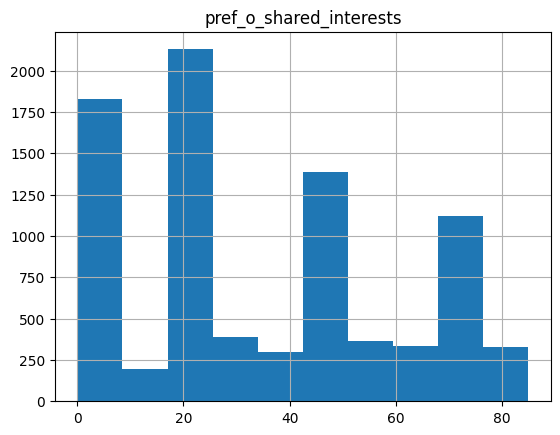

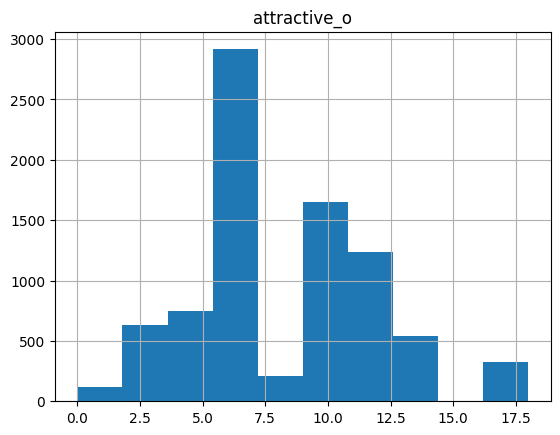

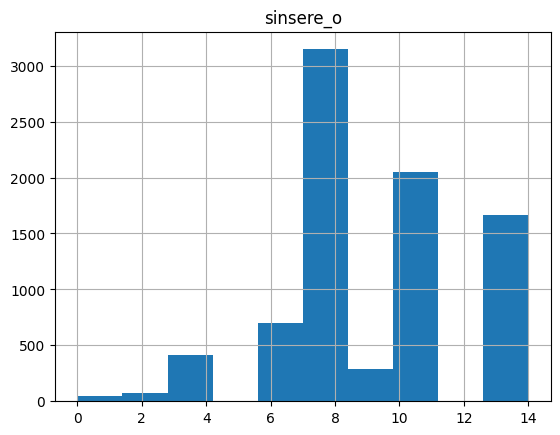

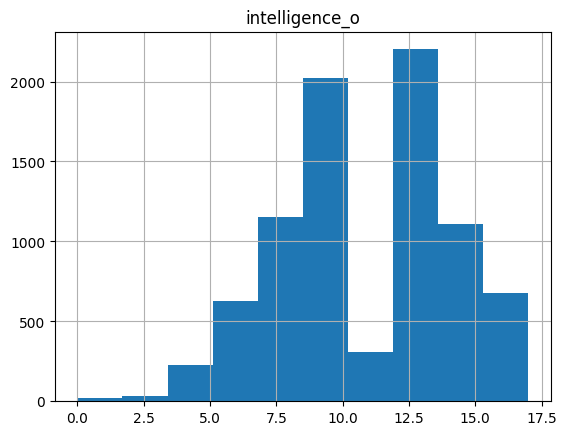

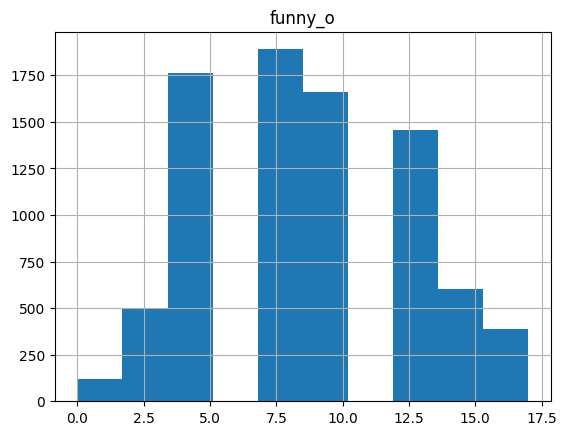

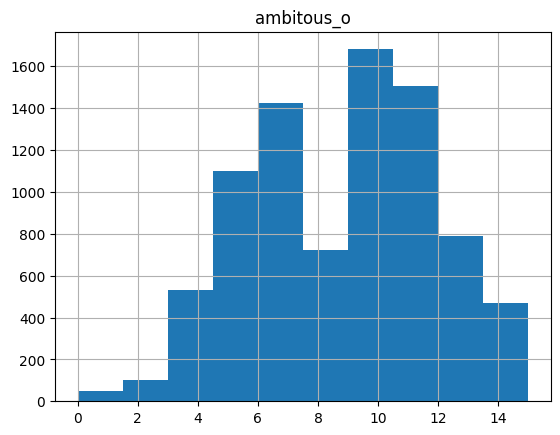

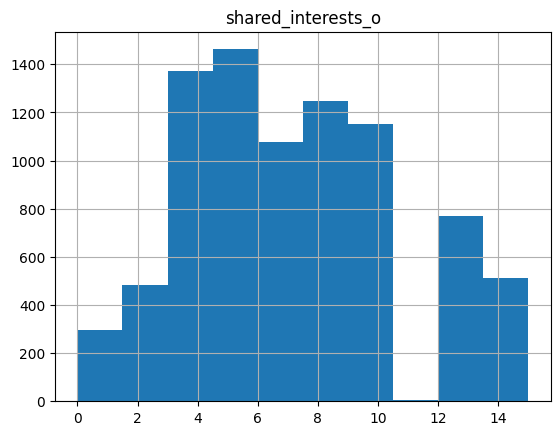

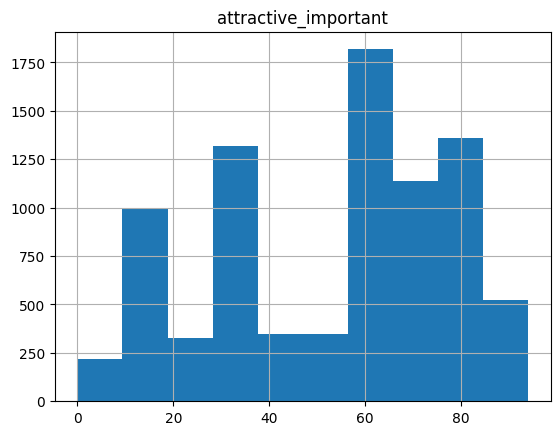

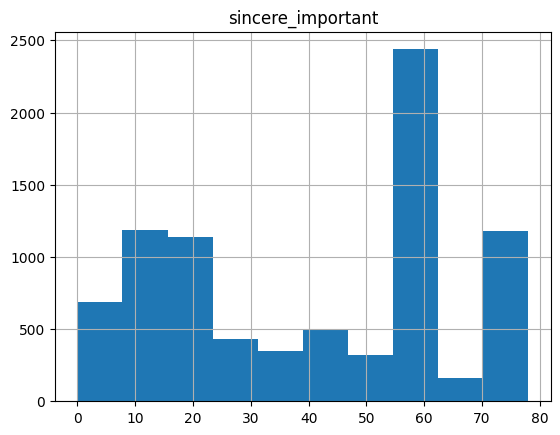

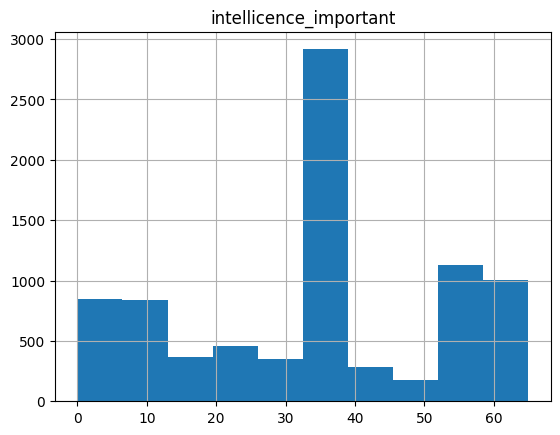

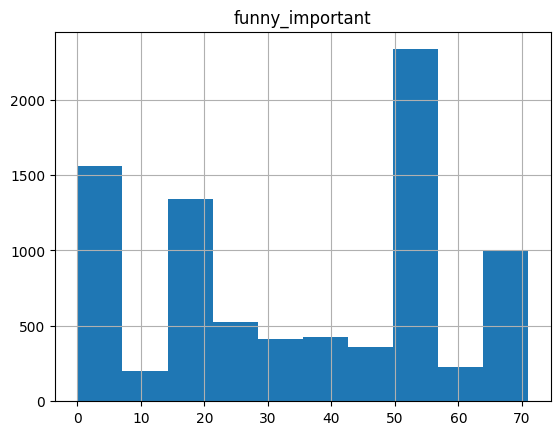

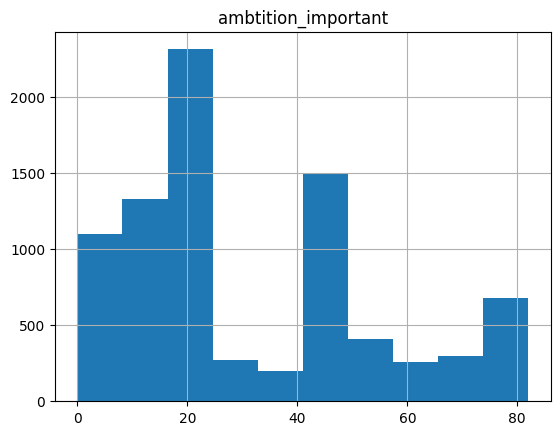

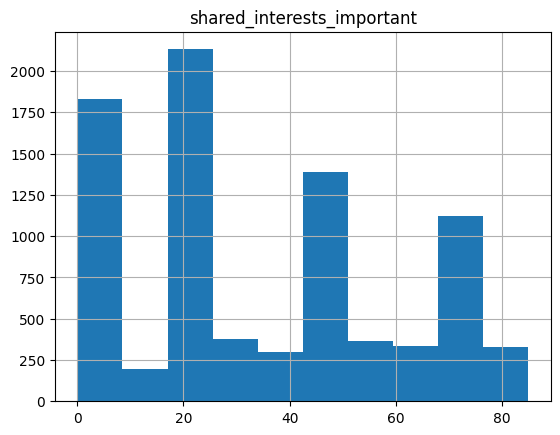

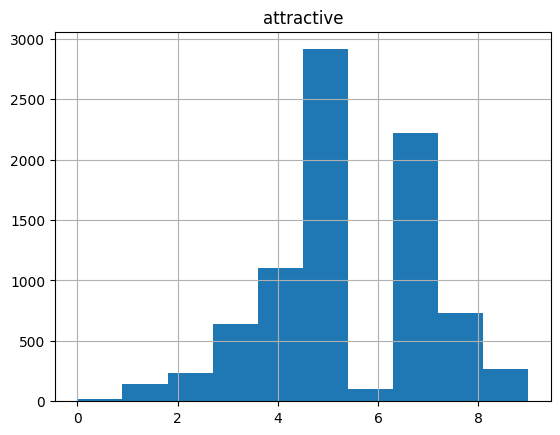

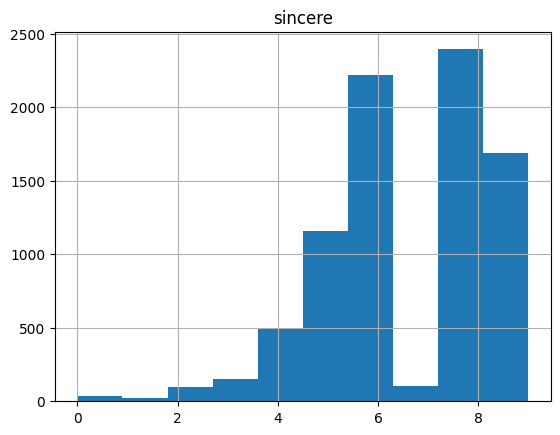

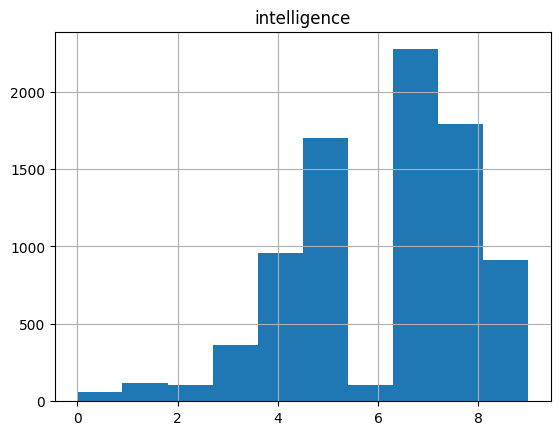

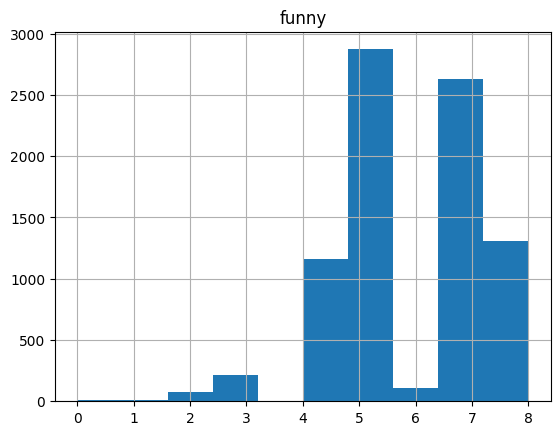

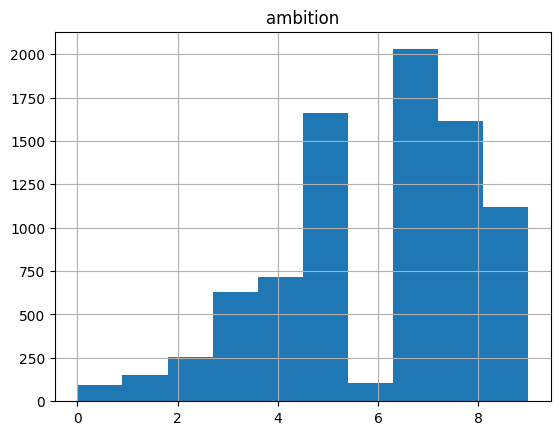

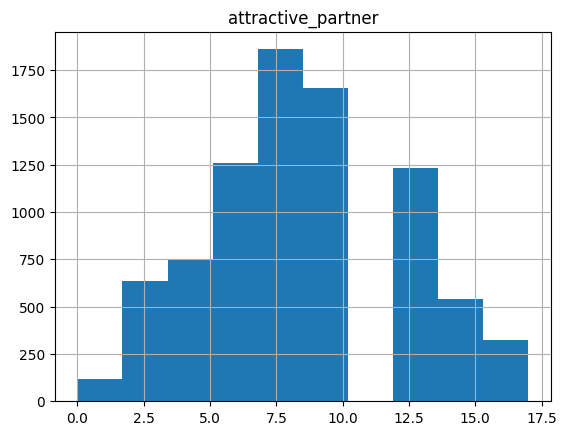

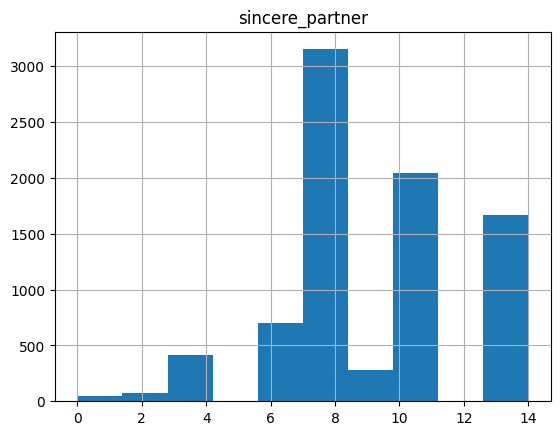

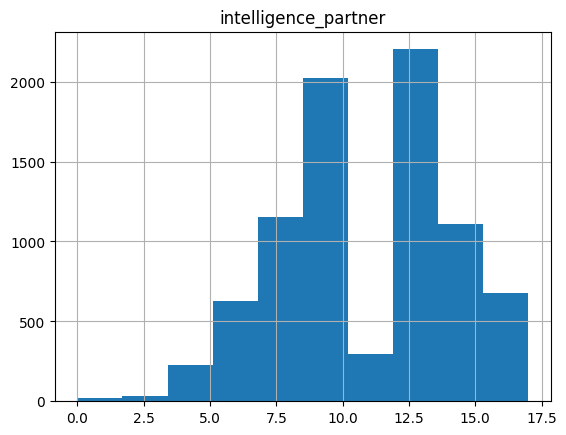

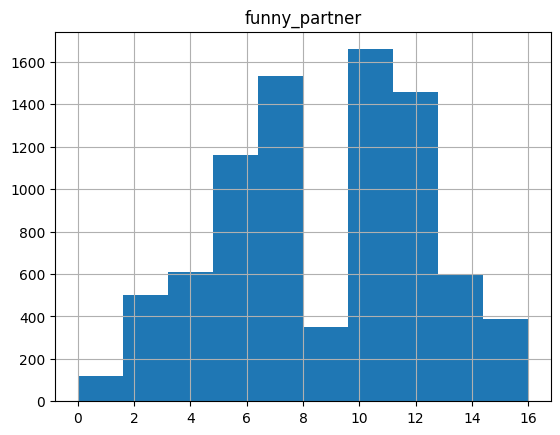

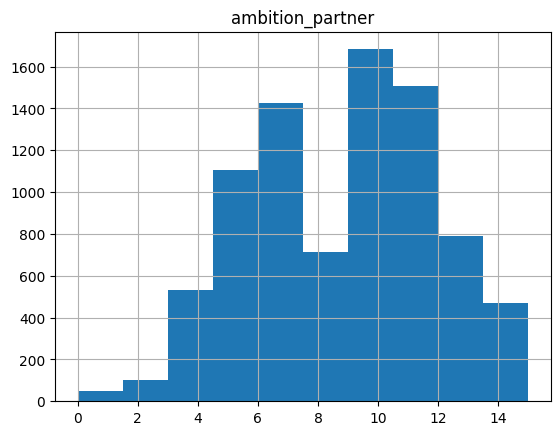

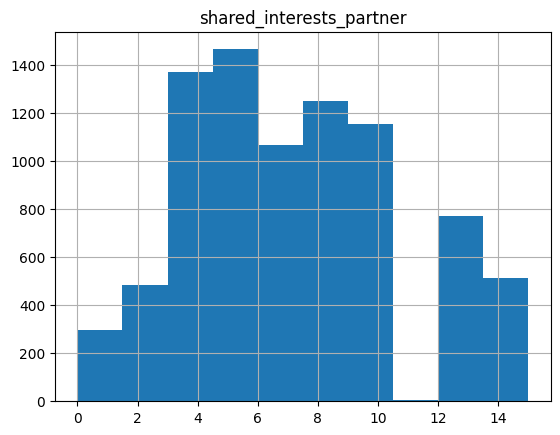

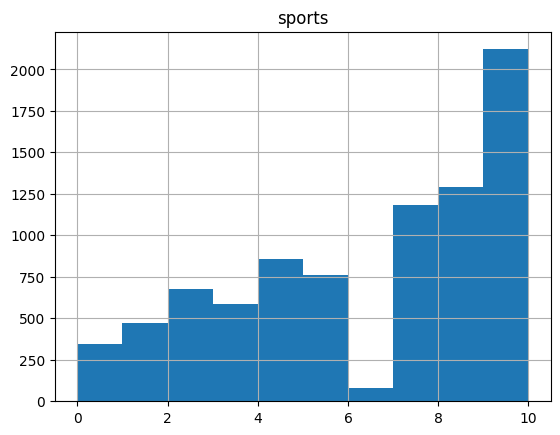

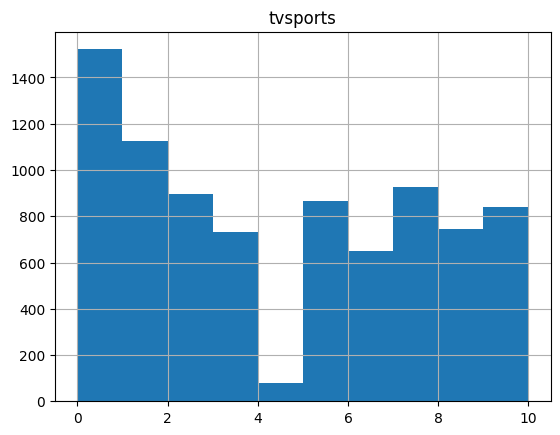

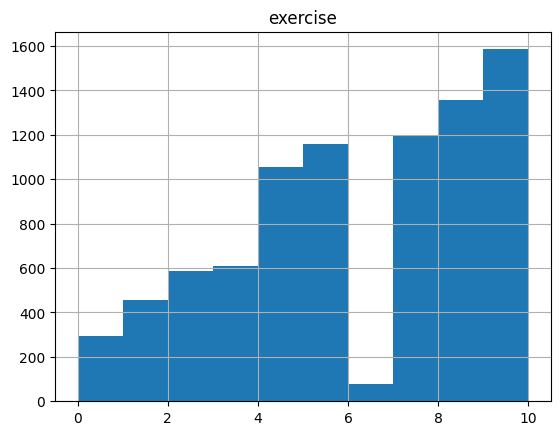

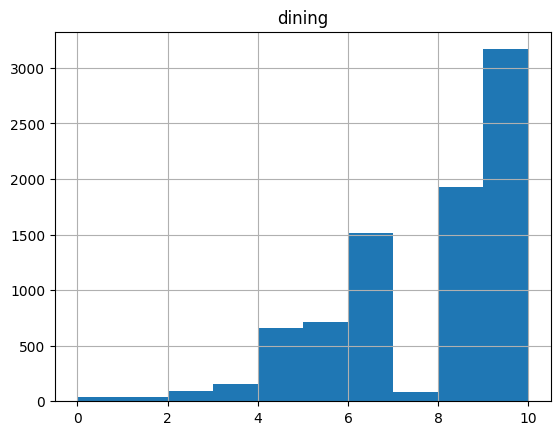

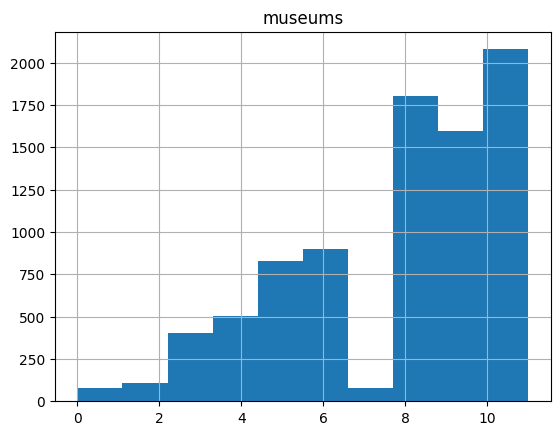

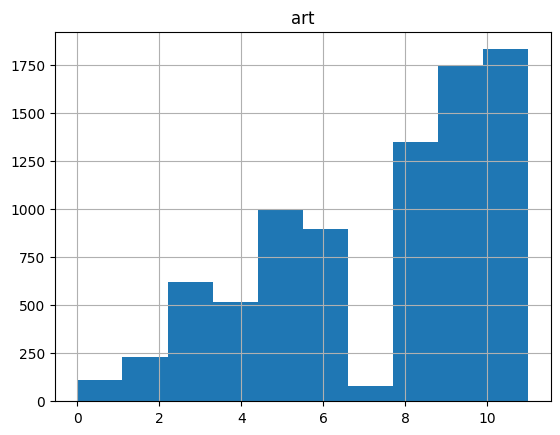

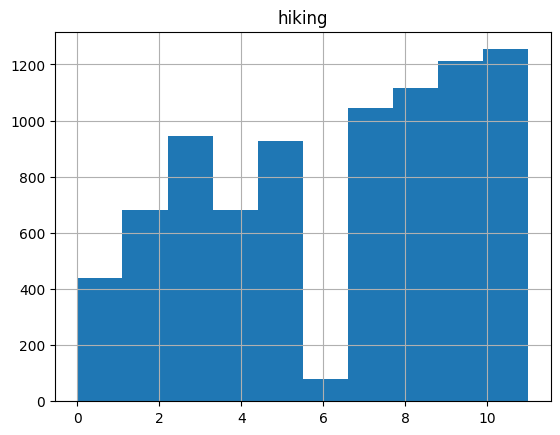

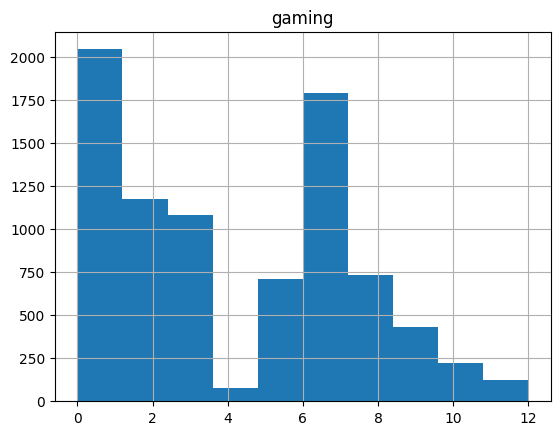

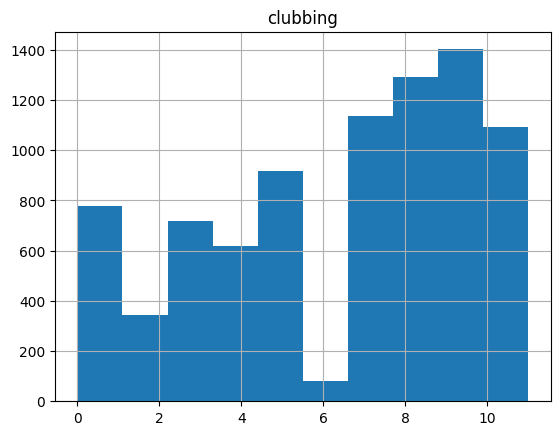

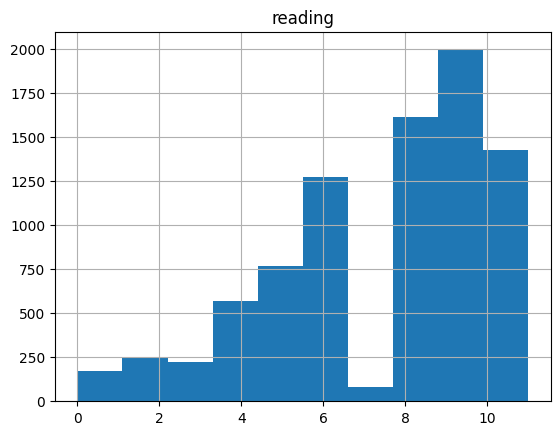

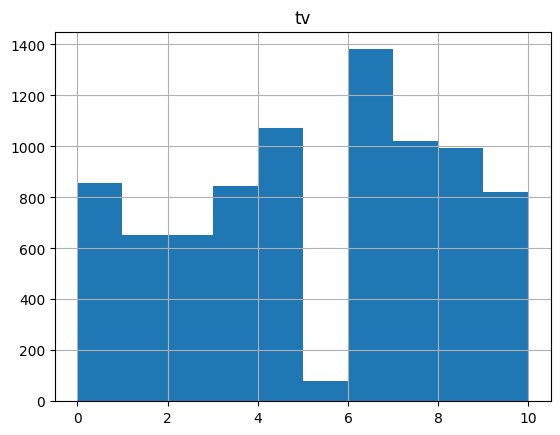

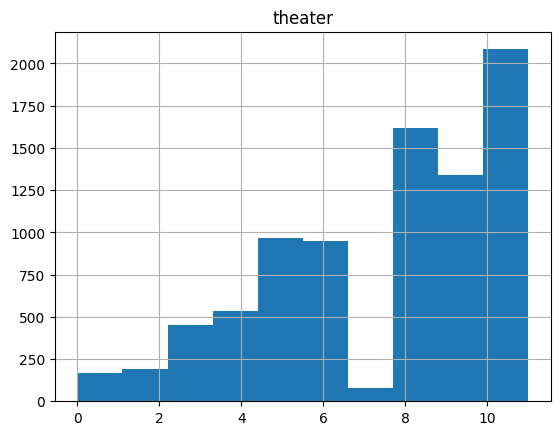

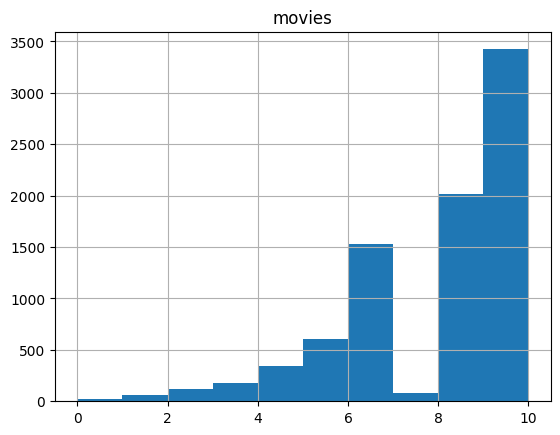

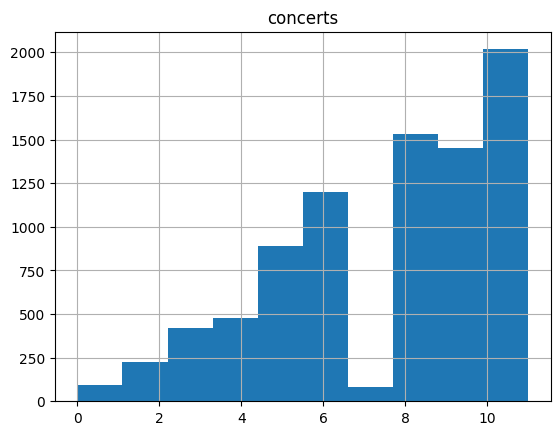

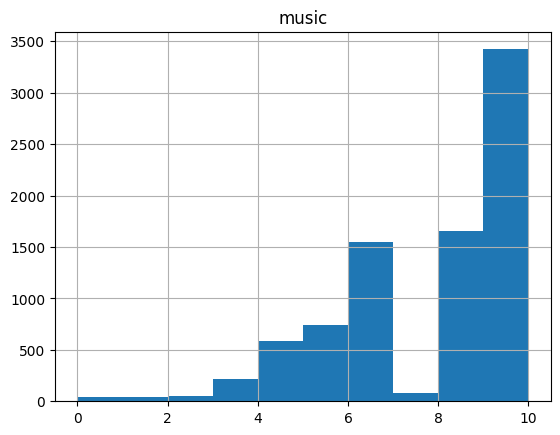

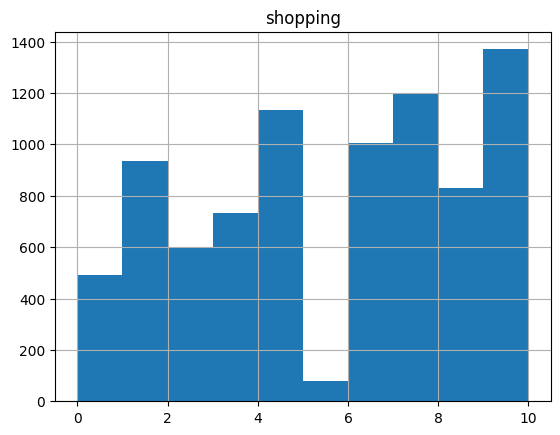

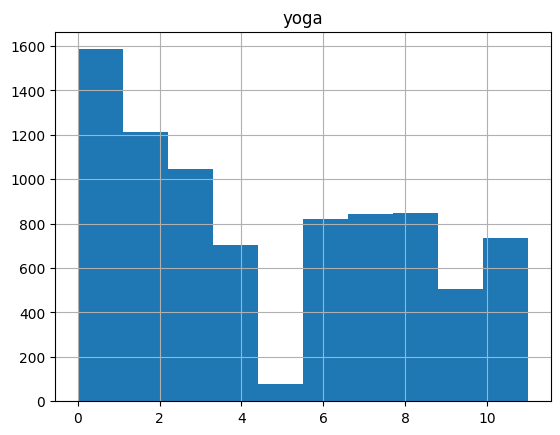

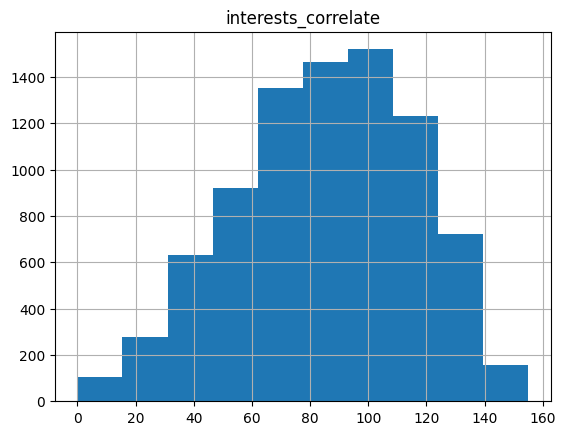

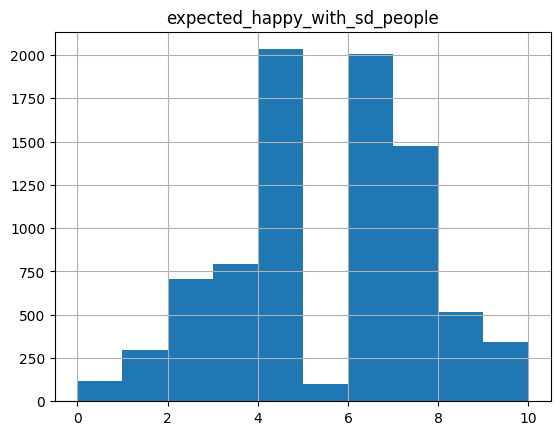

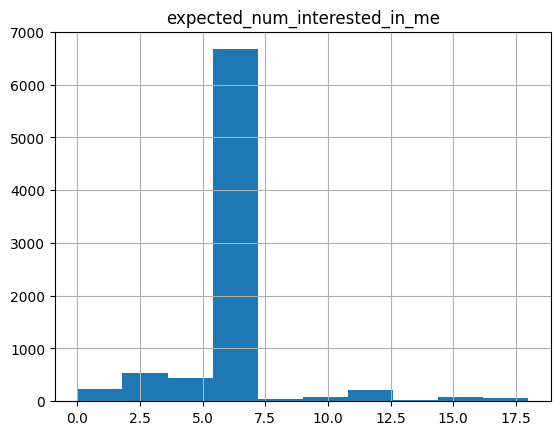

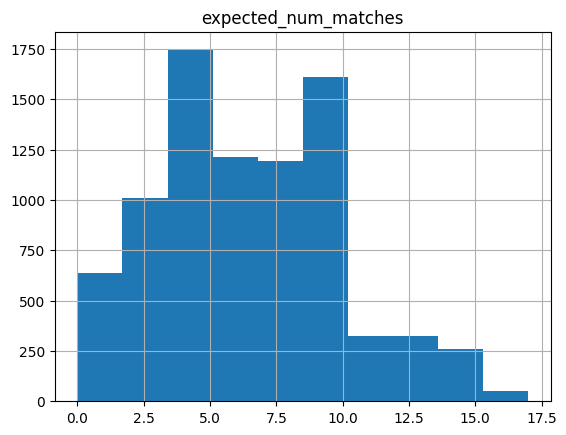

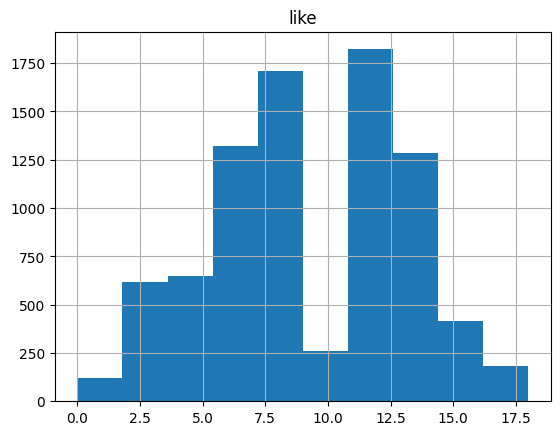

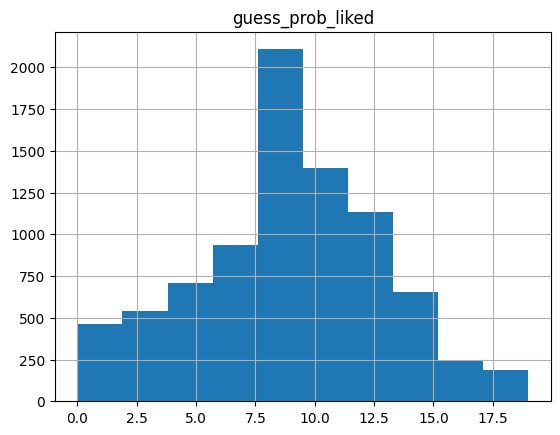

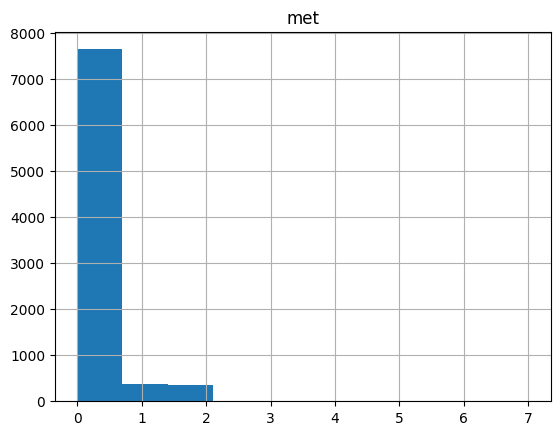

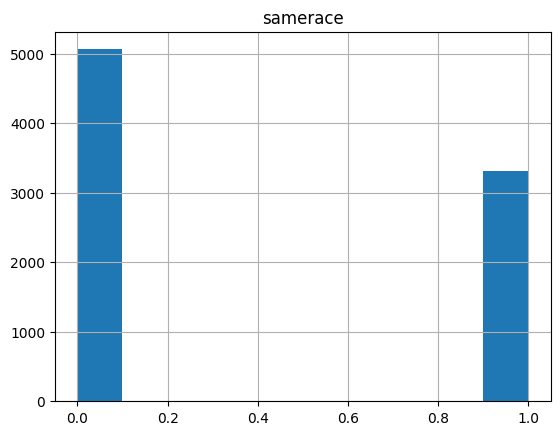

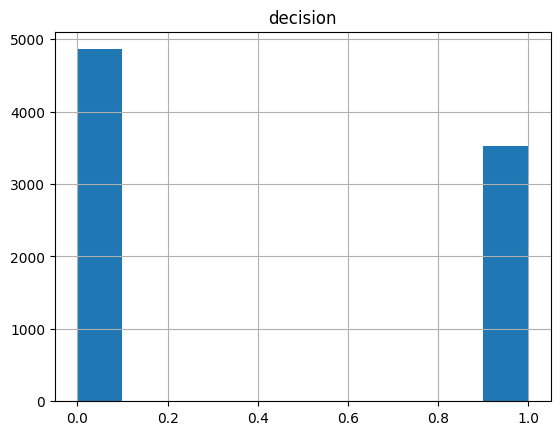

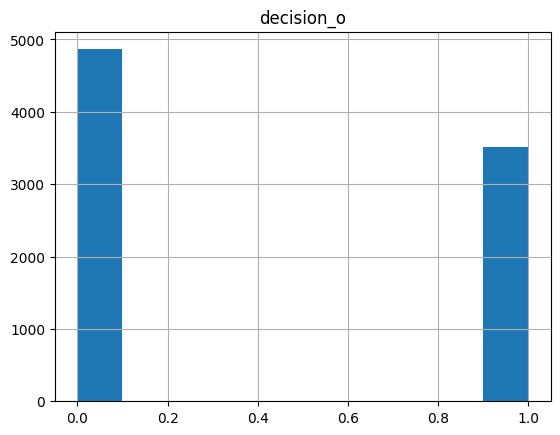

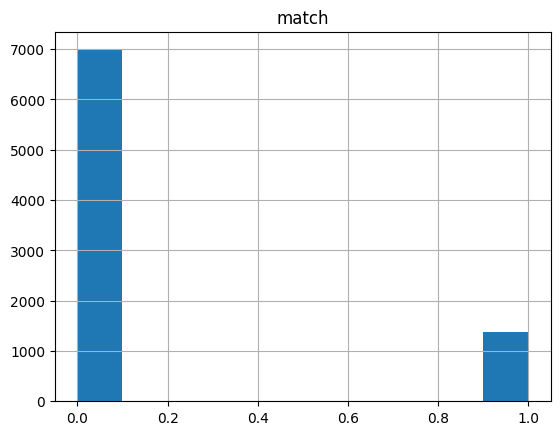

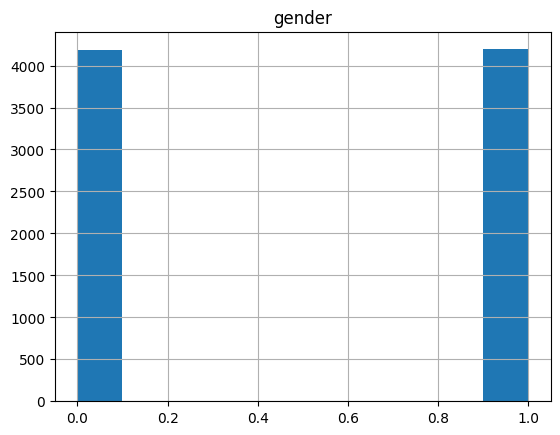

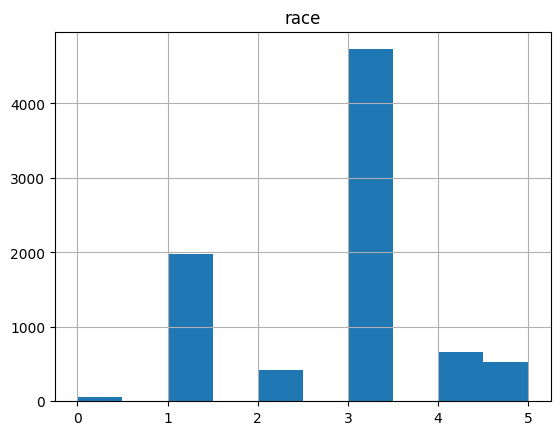

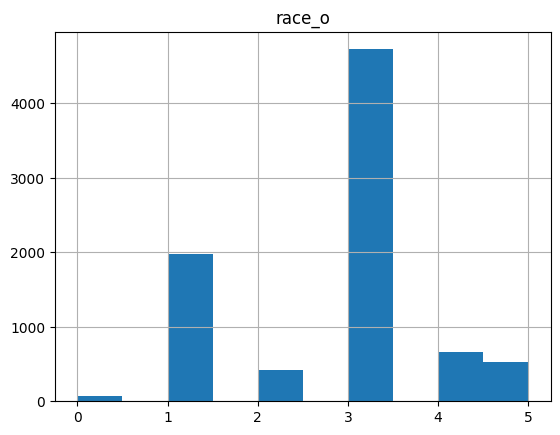

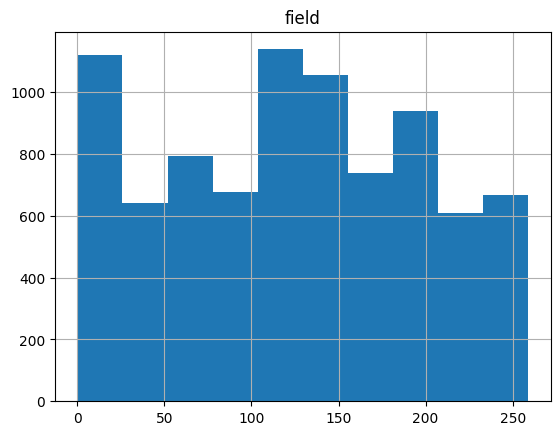

In [60]:
for column in numericColumns + nonNumericColumns: #actually these are now numeric
    df.hist(column=column)
    plt.show()

In [61]:
#print(df[numericColumns].quantile([0.01, 0.25, 0.5, 0.75, 0.99]))
q1 = df[numericColumns].quantile(0.25)
q3 = df[numericColumns].quantile(0.75)
iqr = q3 - q1

low_boundary = (q1 - 1.5 * iqr)
upp_boundary = (q3 + 1.5 * iqr)

num_of_outliers_L = (df[iqr.index] < low_boundary).sum()
num_of_outliers_U = (df[iqr.index] > upp_boundary).sum()

outliers = pd.DataFrame({'ponizej': low_boundary,
                         'powyzej': upp_boundary,
                         'liczba_ponizej': num_of_outliers_L,
                         'liczba_powyzej': num_of_outliers_U})

print(outliers)


                               ponizej  powyzej  liczba_ponizej   
wave                              -6.0     26.0               0  \
age                               -1.5     18.5               0   
age_o                             -1.5     18.5               0   
importance_same_race              -8.0     16.0               0   
importance_same_religion          -9.0     15.0               0   
pref_o_attractive                -38.5    141.5               0   
pref_o_sincere                   -31.5    108.5               0   
pref_o_intelligence              -24.5     99.5               0   
pref_o_funny                     -22.5     93.5               0   
pref_o_ambitious                 -47.0    105.0               0   
pref_o_shared_interests          -27.0    101.0               0   
attractive_o                      -3.0     21.0               0   
sinsere_o                          1.0     17.0               9   
intelligence_o                     5.5     17.5             28

In [62]:
without_outliers = df.copy()
print('Rozmiar zbioru z obserwacjami odstającymi:', without_outliers.shape[0])
for row in outliers.iterrows():
    without_outliers = without_outliers[(without_outliers[row[0]] >= row[1]['ponizej'])
                                                    & (without_outliers[row[0]] <= row[1]['powyzej'])]

print('Rozmiar zbioru po usunięciu obserwacji odstających:', without_outliers.shape[0])

Rozmiar zbioru z obserwacjami odstającymi: 8378
Rozmiar zbioru po usunięciu obserwacji odstających: 5000


# Data split

In [63]:
x_data = df.iloc[:,:-3].values
y_data_is_match = df.iloc[:,-1].values
y_data_is_my_decision_positive = df.iloc[:,-3].values
y_data_is_partners_decision_positive = df.iloc[:,-2].values

x_train_data_is_match, x_test_data_is_match, y_train_data_is_match, y_test_data_is_match = train_test_split(x_data, y_data_is_match, test_size=0.15)
x_train_data_is_my_decision_positive, x_test_data_is_my_decision_positive, y_train_data_is_my_decision_positive, y_test_data_is_my_decision_positive = train_test_split(x_data, y_data_is_my_decision_positive, test_size=0.15)
x_train_data_is_partners_decision_positive, x_test_data_is_partners_decision_positive, y_train_data_is_partners_decision_positive, y_test_data_is_partners_decision_positive = train_test_split(x_data, y_data_is_partners_decision_positive, test_size=0.15)

In [64]:
x_train_data_is_match.shape
y_train_data_is_match.shape

(7121,)

In [65]:
x_data_without_outliers = without_outliers.iloc[:,:-3].values
y_data_is_match_without_outliers = without_outliers.iloc[:,-1].values
y_data_is_my_decision_positive_without_outliers = without_outliers.iloc[:,-3].values
y_data_is_partners_decision_positive_without_outliers = without_outliers.iloc[:,-2].values

(x_train_data_is_match_without_outliers,
 x_test_data_is_match_without_outliers, 
 y_train_data_is_match_without_outliers, 
 y_test_data_is_match_without_outliers) = train_test_split(x_data_without_outliers,
                                            y_data_is_match_without_outliers, test_size=0.15)
(x_train_data_is_my_decision_positive_without_outliers,
x_test_data_is_my_decision_positive_without_outliers,
y_train_data_is_my_decision_positive_without_outliers,
y_test_data_is_my_decision_positive_without_outliers) = train_test_split(x_data_without_outliers, 
                                            y_data_is_my_decision_positive_without_outliers, test_size=0.15)
(x_train_data_is_partners_decision_positive_without_outliers,
 x_test_data_is_partners_decision_positive_without_outliers,
 y_train_data_is_partners_decision_positive_without_outliers,
 y_test_data_is_partners_decision_positive_without_outliers) = train_test_split(x_data_without_outliers,
                                            y_data_is_partners_decision_positive_without_outliers, test_size=0.15)

# Standardization

In [66]:
scaler = StandardScaler()
scaler.fit(x_train_data_is_match)
x_train_data_is_match_std = scaler.transform(x_train_data_is_match)

scaler.fit(x_test_data_is_match)
x_test_data_is_match_std = scaler.transform(x_test_data_is_match)

scaler.fit(x_train_data_is_my_decision_positive)
x_train_data_is_my_decision_positive_std = scaler.transform(x_train_data_is_my_decision_positive)

scaler.fit(x_test_data_is_my_decision_positive)
x_test_data_is_my_decision_positive_std = scaler.transform(x_test_data_is_my_decision_positive)

scaler.fit(x_train_data_is_partners_decision_positive)
x_train_data_is_partners_decision_positive_std = scaler.transform(x_train_data_is_partners_decision_positive)

scaler.fit(x_test_data_is_partners_decision_positive)
x_test_data_is_partners_decision_positive_std = scaler.transform(x_test_data_is_partners_decision_positive)


In [67]:
scaler = StandardScaler()
scaler.fit(x_train_data_is_match_without_outliers)
x_train_data_is_match_without_outliers_std = scaler.transform(x_train_data_is_match_without_outliers)

scaler.fit(x_test_data_is_match_without_outliers)
x_test_data_is_match_without_outliers_std = scaler.transform(x_test_data_is_match_without_outliers)

scaler.fit(x_train_data_is_my_decision_positive_without_outliers)
x_train_data_is_my_decision_positive_without_outliers_std = scaler.transform(x_train_data_is_my_decision_positive_without_outliers)

scaler.fit(x_test_data_is_my_decision_positive_without_outliers)
x_test_data_is_my_decision_positive_without_outliers_std = scaler.transform(x_test_data_is_my_decision_positive_without_outliers)

scaler.fit(x_train_data_is_partners_decision_positive_without_outliers)
x_train_data_is_partners_decision_positive_without_outliers_std = scaler.transform(x_train_data_is_partners_decision_positive_without_outliers)

scaler.fit(x_test_data_is_partners_decision_positive_without_outliers)
x_test_data_is_partners_decision_positive_without_outliers_std = scaler.transform(x_test_data_is_partners_decision_positive_without_outliers)


# Normalization

In [68]:
normalizer = Normalizer()
normalizer.fit(x_train_data_is_match)
x_train_data_is_match_nrm = normalizer.transform(x_train_data_is_match)

normalizer.fit(x_test_data_is_match)
x_test_data_is_match_nrm = normalizer.transform(x_test_data_is_match)

normalizer.fit(x_train_data_is_my_decision_positive)
x_train_data_is_my_decision_positive_nrm = normalizer.transform(x_train_data_is_my_decision_positive)

normalizer.fit(x_test_data_is_my_decision_positive)
x_test_data_is_my_decision_positive_nrm = normalizer.transform(x_test_data_is_my_decision_positive)

normalizer.fit(x_train_data_is_partners_decision_positive)
x_train_data_is_partners_decision_positive_nrm = normalizer.transform(x_train_data_is_partners_decision_positive)

normalizer.fit(x_test_data_is_partners_decision_positive)
x_test_data_is_partners_decision_positive_nrm = normalizer.transform(x_test_data_is_partners_decision_positive)

In [69]:
normalizer = Normalizer()
normalizer.fit(x_train_data_is_match_without_outliers)
x_train_data_is_match_without_outliers_nrm= normalizer.transform(x_train_data_is_match_without_outliers)

normalizer.fit(x_test_data_is_match_without_outliers)
x_test_data_is_match_without_outliers_nrm = normalizer.transform(x_test_data_is_match_without_outliers)

normalizer.fit(x_train_data_is_my_decision_positive_without_outliers)
x_train_data_is_my_decision_positive_without_outliers_nrm = normalizer.transform(x_train_data_is_my_decision_positive_without_outliers)

normalizer.fit(x_test_data_is_my_decision_positive_without_outliers)
x_test_data_is_my_decision_positive_without_outliers_nrm = normalizer.transform(x_test_data_is_my_decision_positive_without_outliers)

normalizer.fit(x_train_data_is_partners_decision_positive_without_outliers)
x_train_data_is_partners_decision_positive_without_outliers_nrm = normalizer.transform(x_train_data_is_partners_decision_positive_without_outliers)

normalizer.fit(x_test_data_is_partners_decision_positive_without_outliers)
x_test_data_is_partners_decision_positive_without_outliers_nrm = normalizer.transform(x_test_data_is_partners_decision_positive_without_outliers)


# Dimension overload

 1) attractive_o                   0.049822
 2) like                           0.048594
 3) funny_o                        0.043250
 4) shared_interests_o             0.038670
 5) attractive_partner             0.036425
 6) funny_partner                  0.033686
 7) guess_prob_liked               0.029405
 8) shared_interests_partner       0.028803
 9) interests_correlate            0.025964
10) pref_o_attractive              0.020442
11) field                          0.020402
12) pref_o_intelligence            0.019500
13) pref_o_shared_interests        0.019335
14) expected_num_matches           0.018807
15) age_o                          0.018756
16) pref_o_funny                   0.018384
17) pref_o_sincere                 0.018195
18) pref_o_ambitious               0.018097
19) ambitous_o                     0.015533
20) sinsere_o                      0.015362
21) intelligence_o                 0.015203
22) intellicence_important         0.014951
23) attractive_important        

(-1.0, 63.0)

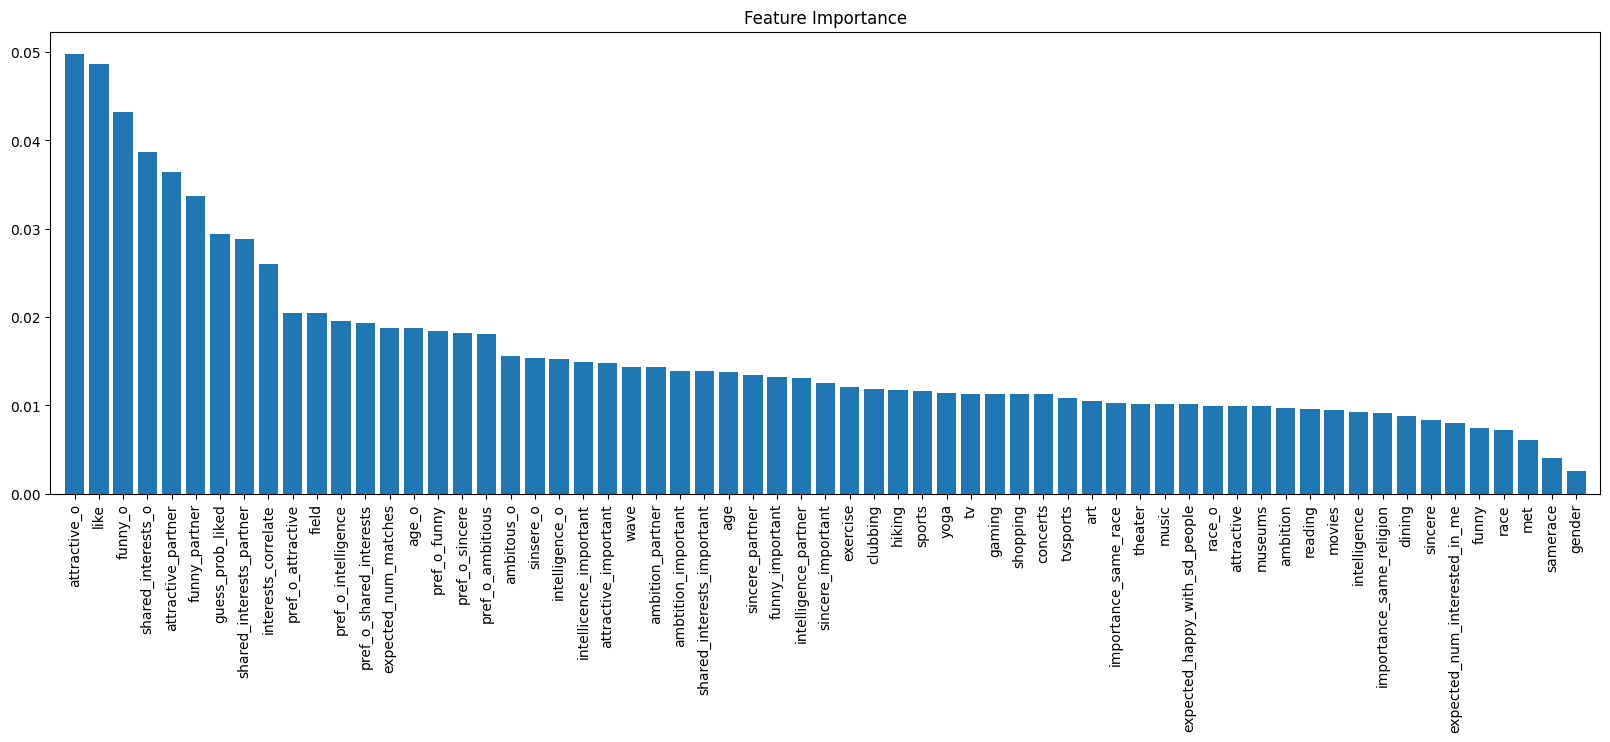

In [70]:
#Random Forest
feat_labels = df.columns
#print(feat_labels)
forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(x_train_data_is_match, y_train_data_is_match)
importances = forest.feature_importances_
#print(importances)
indices = np.argsort(importances)[::-1]
#print(indices)
for f in range(x_train_data_is_match.shape[1]-1):
  print("%2d) %-*s %f" % (f + 1, 30,
  feat_labels[indices[f]],
  importances[indices[f]]))
figure(num=1, figsize=(20, 6))
plt.title('Feature Importance')
plt.bar(range(x_train_data_is_match.shape[1]), importances[indices], align='center')
plt.xticks(range(x_train_data_is_match.shape[1]),
           feat_labels[indices], rotation=90)
plt.xlim([-1,x_train_data_is_match.shape[1]])

 1) like                           1162.685001
 2) funny_o                        1000.453465
 3) shared_interests_o             979.746641
 4) guess_prob_liked               964.787491
 5) funny_partner                  939.733862
 6) shared_interests_partner       931.089185
 7) attractive_o                   831.244937
 8) attractive_partner             776.478148
 9) shared_interests_important     368.252142
10) pref_o_shared_interests        285.495876
11) expected_num_matches           278.092553
12) intelligence_o                 205.267031
13) intelligence_partner           202.871042
14) sinsere_o                      185.757299
15) funny_important                180.172701
16) sincere_partner                180.004872
17) ambition_partner               156.710230
18) ambitous_o                     153.497184
19) pref_o_funny                   139.024252
20) met                            111.626132
21) intellicence_important         86.483923
22) sincere_important            

(-1.0, 63.0)

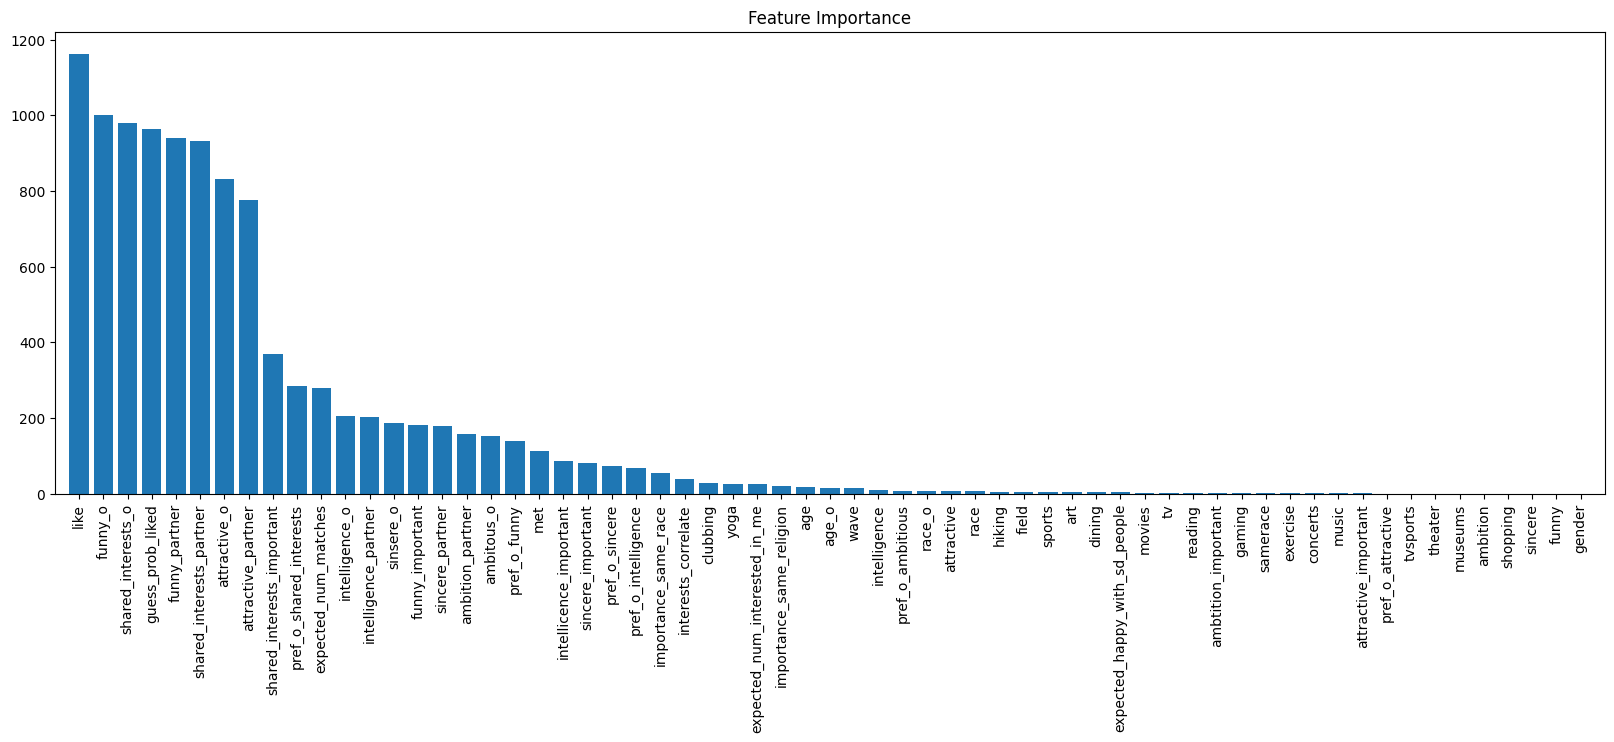

In [71]:
feature_selector = SelectKBest(k=5, score_func=chi2)
test = feature_selector.fit(x_train_data_is_match, y_train_data_is_match)
indices = np.argsort(test.scores_)[::-1]
feat_labels = df.columns

for f in range(x_train_data_is_match.shape[1]-1):
  print("%2d) %-*s %f" % (f + 1, 30,
  feat_labels[indices[f]],
  test.scores_[indices[f]]))
figure(num=1, figsize=(20, 6))
plt.title('Feature Importance')
plt.bar(range(x_train_data_is_match.shape[1]), test.scores_[indices], align='center')
plt.xticks(range(x_train_data_is_match.shape[1]),
           feat_labels[indices], rotation=90)
plt.xlim([-1,x_train_data_is_match.shape[1]])

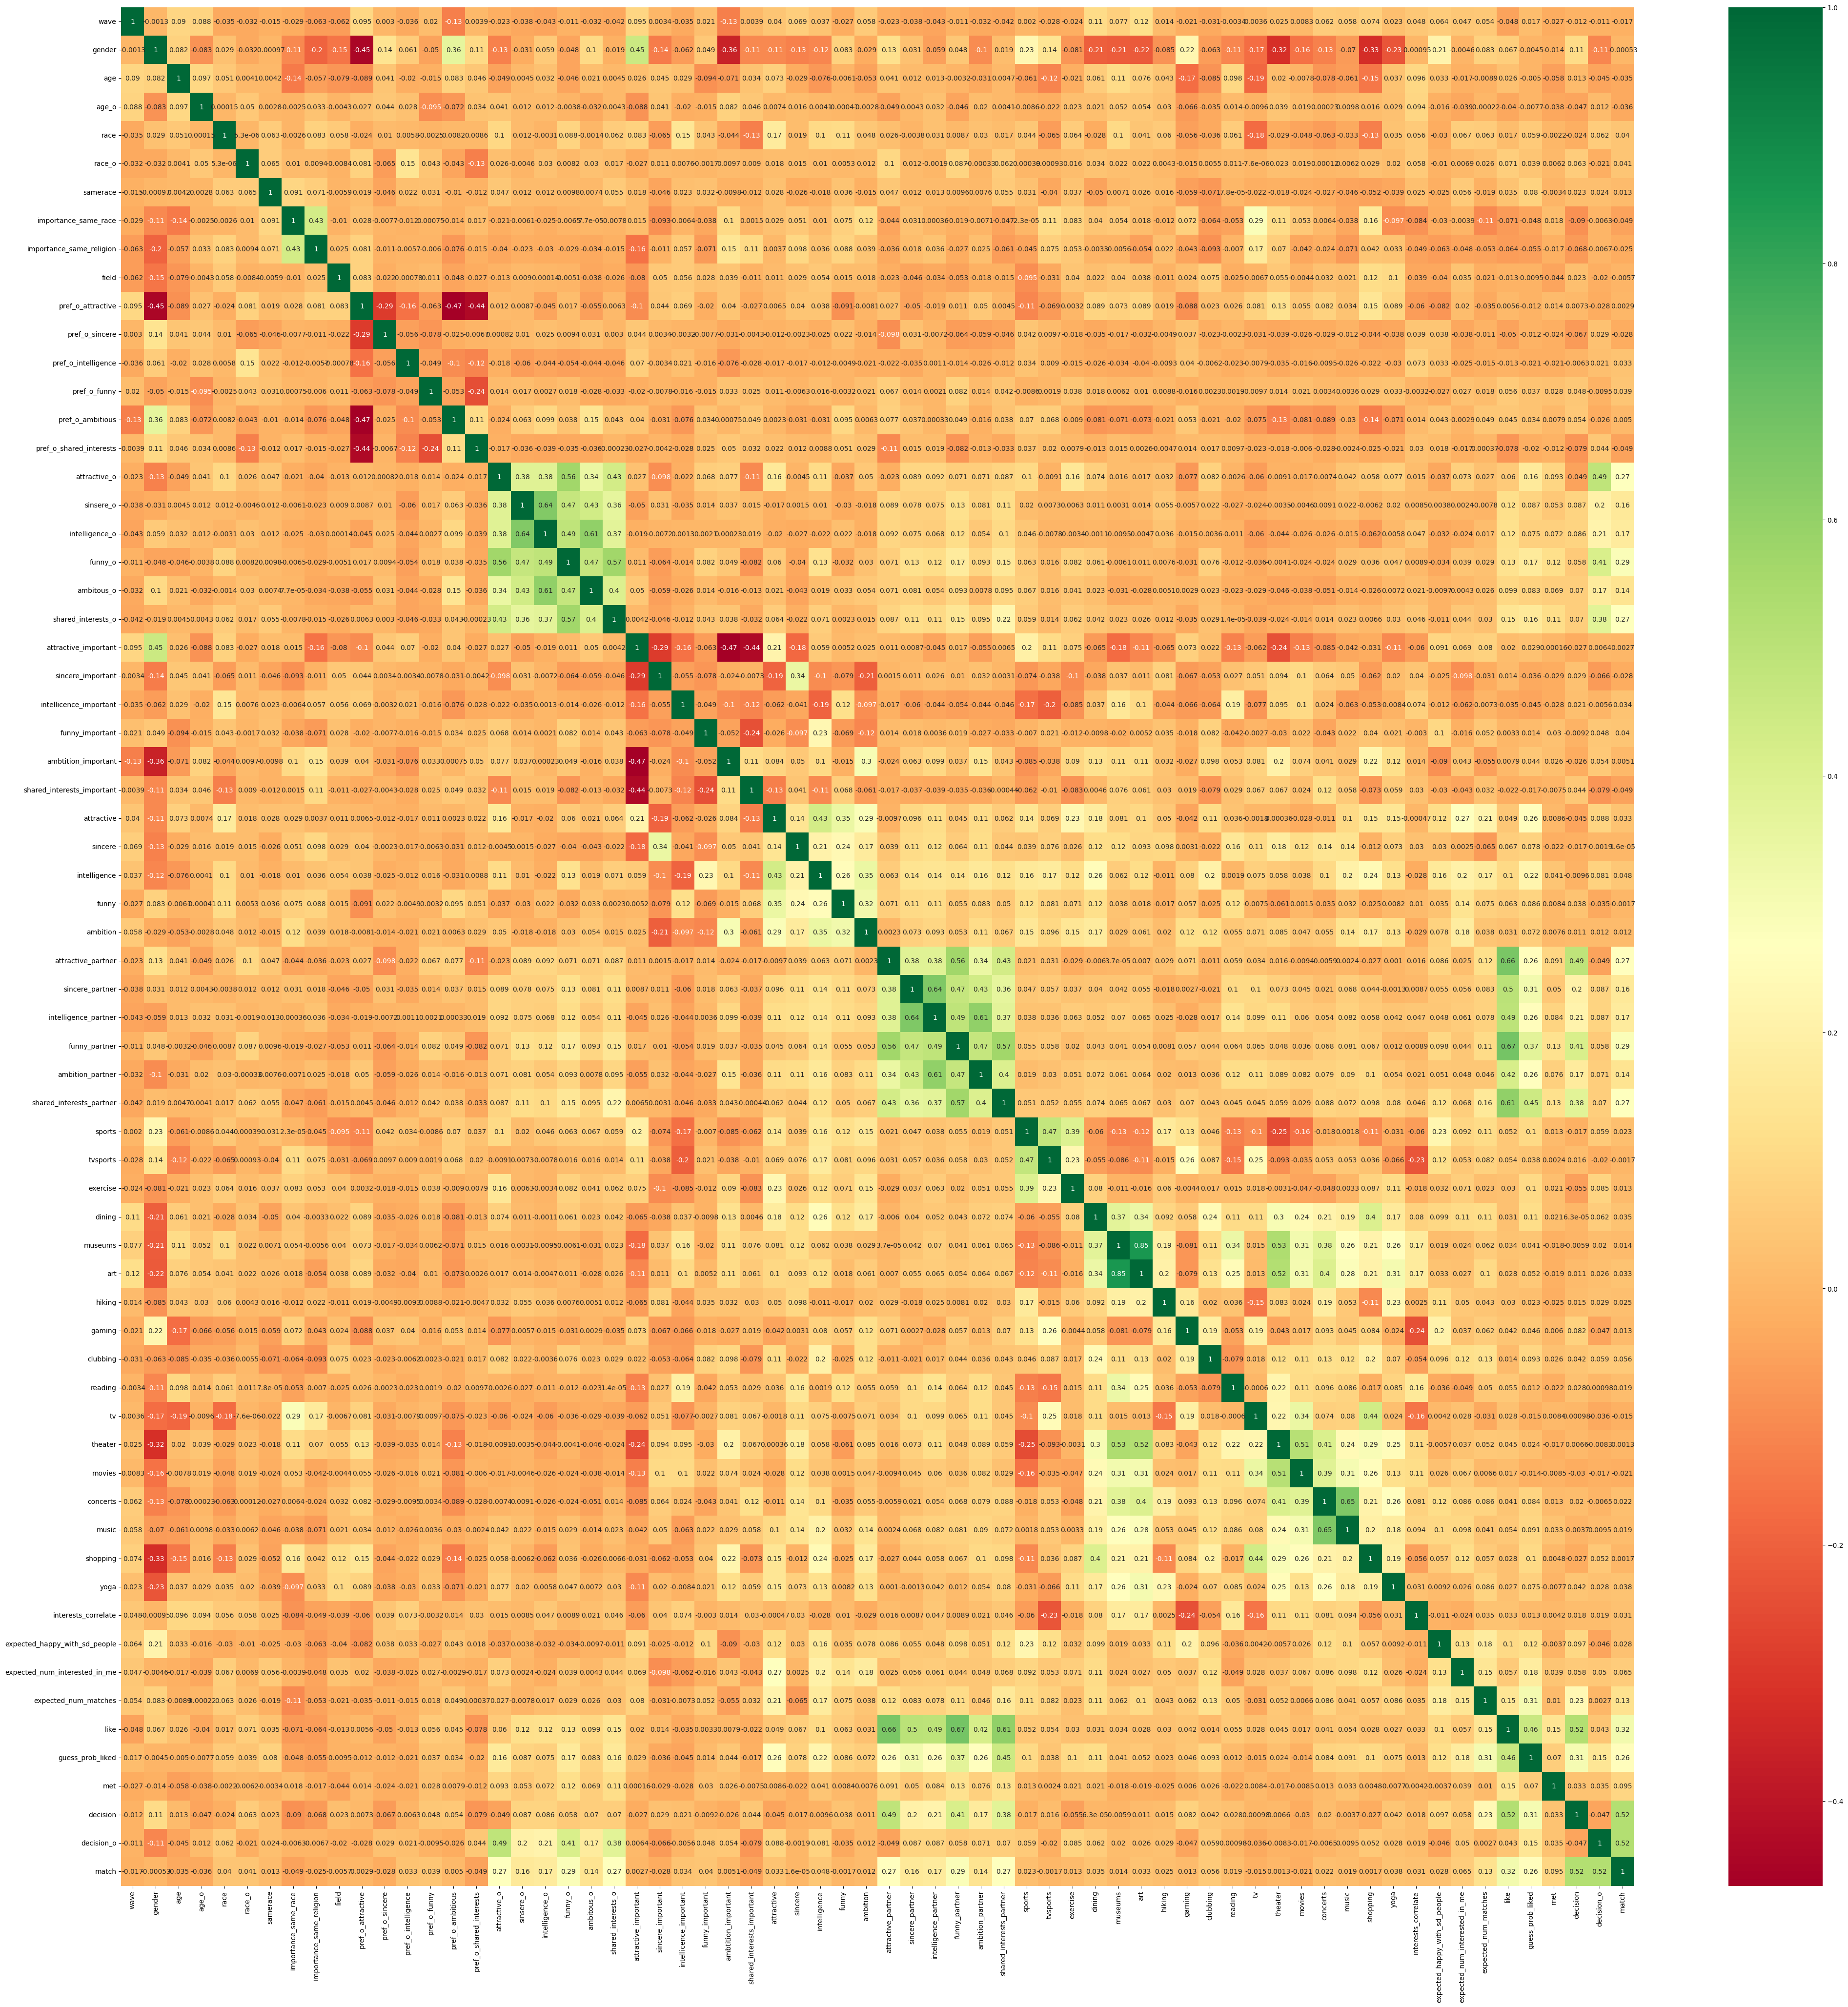

In [72]:
# Correlation matrix with heat map
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(50,50))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Linear Regression

# Best Parameters - Grid Search

In [87]:
parameters = {"penalty": ["l2"], "C": [1000, 100, 10, 5, 2, 1, 1/2, 1/5, 1/10, 1/100, 1/1000]}

# Is Match 

In [73]:
clf = GridSearchCV(LogisticRegression(), parameters, scoring='accuracy')
gs = clf.fit(x_train_data_is_match_std, y_train_data_is_match)
print(gs.best_params_)
print(gs.score(x_train_data_is_match_std, y_train_data_is_match))
print(gs.score(x_test_data_is_match_std, y_test_data_is_match))
prediction = clf.predict(x_test_data_is_match_std)

{'C': 0.2, 'penalty': 'l2'}
0.8566212610588401
0.8735083532219571


(1257,)
(1257,)


0.8735083532219571

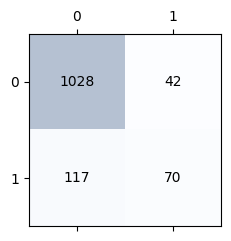

In [74]:
DrawConfusionMatrix(y_test_data_is_match, prediction)

In [78]:
clf = GridSearchCV(LogisticRegression(), parameters, scoring='accuracy')
gs = clf.fit(x_train_data_is_match_nrm, y_train_data_is_match)
print(gs.best_params_)
print(gs.score(x_train_data_is_match_nrm, y_train_data_is_match))
print(gs.score(x_test_data_is_match_nrm, y_test_data_is_match))
prediction = clf.predict(x_test_data_is_match_nrm)

C:\Users\pgtar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\pgtar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

{'C': 100, 'penalty': 'l2'}
0.8583064176379722
0.8695306284805091


C:\Users\pgtar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(1257,)
(1257,)


0.8695306284805091

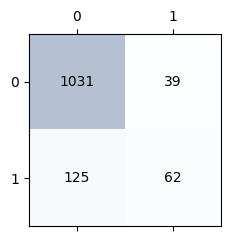

In [79]:
DrawConfusionMatrix(y_test_data_is_match, prediction)

In [80]:
clf = GridSearchCV(LogisticRegression(), parameters, scoring='accuracy')
gs = clf.fit(x_train_data_is_match_without_outliers_std, y_train_data_is_match_without_outliers)
print(gs.best_params_)
print(gs.score(x_train_data_is_match_without_outliers_std, y_train_data_is_match_without_outliers))
print(gs.score(x_test_data_is_match_without_outliers_std, y_test_data_is_match_without_outliers))
prediction = clf.predict(x_test_data_is_match_without_outliers_std)

{'C': 0.01, 'penalty': 'l2'}
0.855764705882353
0.848


(750,)
(750,)


0.848

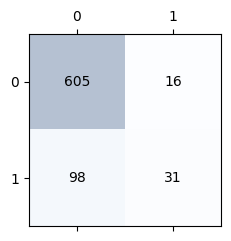

In [81]:
DrawConfusionMatrix(y_test_data_is_match_without_outliers, prediction)

In [82]:
clf = GridSearchCV(LogisticRegression(), parameters, scoring='accuracy')
gs = clf.fit(x_train_data_is_match_without_outliers_nrm, y_train_data_is_match_without_outliers)
print(gs.best_params_)
print(gs.score(x_train_data_is_match_without_outliers_nrm, y_train_data_is_match_without_outliers))
print(gs.score(x_test_data_is_match_without_outliers_nrm, y_test_data_is_match_without_outliers))
prediction = clf.predict(x_test_data_is_match_without_outliers_nrm)

C:\Users\pgtar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\pgtar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

{'C': 100, 'penalty': 'l2'}
0.8588235294117647
0.8493333333333334


C:\Users\pgtar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(750,)
(750,)


0.8493333333333334

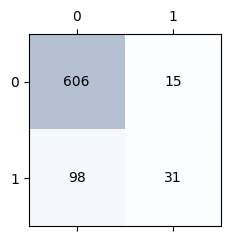

In [84]:
DrawConfusionMatrix(y_test_data_is_match_without_outliers, prediction)

# Is my decision positive

In [85]:
clf = GridSearchCV(LogisticRegression(), parameters, scoring='accuracy')
gs = clf.fit(x_train_data_is_my_decision_positive_std, y_train_data_is_my_decision_positive)
print(gs.best_params_)
print(gs.score(x_train_data_is_my_decision_positive_std, y_train_data_is_my_decision_positive))
print(gs.score(x_test_data_is_my_decision_positive_std, y_test_data_is_my_decision_positive))
prediction = clf.predict(x_test_data_is_my_decision_positive_std)

{'C': 2, 'penalty': 'l2'}
0.8025558208116838
0.7971360381861575


(1257,)
(1257,)


0.7971360381861575

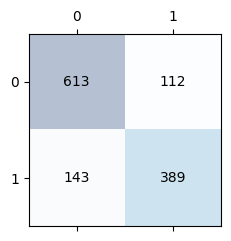

In [86]:
DrawConfusionMatrix(y_test_data_is_my_decision_positive, prediction)

In [88]:
clf = GridSearchCV(LogisticRegression(), parameters, scoring='accuracy')
gs = clf.fit(x_train_data_is_my_decision_positive_nrm, y_train_data_is_my_decision_positive)
print(gs.best_params_)
print(gs.score(x_train_data_is_my_decision_positive_nrm, y_train_data_is_my_decision_positive))
print(gs.score(x_test_data_is_my_decision_positive_nrm, y_test_data_is_my_decision_positive))
prediction = clf.predict(x_test_data_is_my_decision_positive_nrm)

C:\Users\pgtar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\pgtar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

{'C': 1000, 'penalty': 'l2'}
0.797219491644432
0.7844073190135242


C:\Users\pgtar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


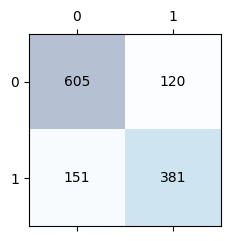

In [89]:
DrawConfusionMatrix(y_test_data_is_my_decision_positive, prediction)

In [90]:
clf = GridSearchCV(LogisticRegression(), parameters, scoring='accuracy')
gs = clf.fit(x_train_data_is_my_decision_positive_without_outliers_std, y_train_data_is_my_decision_positive_without_outliers)
print(gs.best_params_)
print(gs.score(x_train_data_is_my_decision_positive_without_outliers_std, y_train_data_is_my_decision_positive_without_outliers))
print(gs.score(x_test_data_is_my_decision_positive_without_outliers_std, y_test_data_is_my_decision_positive_without_outliers))
prediction = clf.predict(x_test_data_is_my_decision_positive_without_outliers_std)

{'C': 0.01, 'penalty': 'l2'}
0.8025882352941176
0.8066666666666666


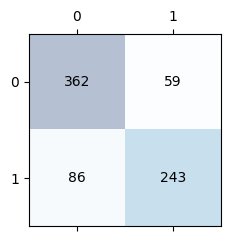

In [91]:
DrawConfusionMatrix(y_test_data_is_my_decision_positive_without_outliers, prediction)

In [92]:
clf = GridSearchCV(LogisticRegression(), parameters, scoring='accuracy')
gs = clf.fit(x_train_data_is_my_decision_positive_without_outliers_nrm, y_train_data_is_my_decision_positive_without_outliers)
print(gs.best_params_)
print(gs.score(x_train_data_is_my_decision_positive_without_outliers_nrm, y_train_data_is_my_decision_positive_without_outliers))
print(gs.score(x_test_data_is_my_decision_positive_without_outliers_nrm, y_test_data_is_my_decision_positive_without_outliers))
prediction = clf.predict(x_test_data_is_my_decision_positive_without_outliers_nrm)

C:\Users\pgtar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\pgtar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

{'C': 1000, 'penalty': 'l2'}
0.804235294117647
0.8013333333333333


C:\Users\pgtar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


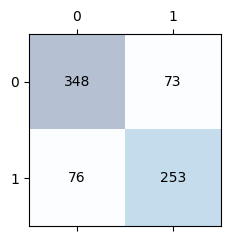

In [93]:
DrawConfusionMatrix(y_test_data_is_my_decision_positive_without_outliers, prediction)

# Is partners decision positive

In [98]:
clf = GridSearchCV(LogisticRegression(), parameters, scoring='accuracy')
gs = clf.fit(x_train_data_is_partners_decision_positive_std, y_train_data_is_partners_decision_positive)
print(gs.best_params_)
print(gs.score(x_train_data_is_partners_decision_positive_std, y_train_data_is_partners_decision_positive))
print(gs.score(x_test_data_is_partners_decision_positive_std, y_test_data_is_partners_decision_positive))
prediction = clf.predict(x_test_data_is_partners_decision_positive_std)

{'C': 0.1, 'penalty': 'l2'}
0.7625333520572953
0.7764518695306285


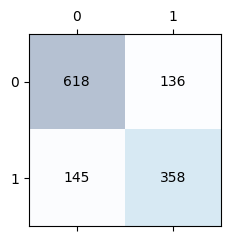

In [100]:
DrawConfusionMatrix(y_test_data_is_partners_decision_positive, prediction)

In [101]:
clf = GridSearchCV(LogisticRegression(), parameters, scoring='accuracy')
gs = clf.fit(x_train_data_is_partners_decision_positive_nrm, y_train_data_is_partners_decision_positive)
print(gs.best_params_)
print(gs.score(x_train_data_is_partners_decision_positive_nrm, y_train_data_is_partners_decision_positive))
print(gs.score(x_test_data_is_partners_decision_positive_nrm, y_test_data_is_partners_decision_positive))
prediction = clf.predict(x_test_data_is_partners_decision_positive_nrm)

C:\Users\pgtar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\pgtar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

{'C': 1000, 'penalty': 'l2'}
0.7559331554556944
0.7653142402545744


C:\Users\pgtar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


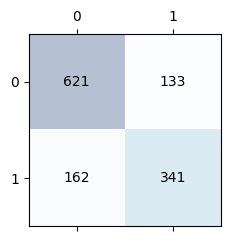

In [102]:
DrawConfusionMatrix(y_test_data_is_partners_decision_positive, prediction)

In [103]:
clf = GridSearchCV(LogisticRegression(), parameters, scoring='accuracy')
gs = clf.fit(x_train_data_is_partners_decision_positive_without_outliers_std, y_train_data_is_partners_decision_positive_without_outliers)
print(gs.best_params_)
print(gs.score(x_train_data_is_partners_decision_positive_without_outliers_std, y_train_data_is_partners_decision_positive_without_outliers))
print(gs.score(x_test_data_is_partners_decision_positive_without_outliers_std, y_test_data_is_partners_decision_positive_without_outliers))
prediction = clf.predict(x_test_data_is_partners_decision_positive_without_outliers_std)

{'C': 1000, 'penalty': 'l2'}
0.7637647058823529
0.736


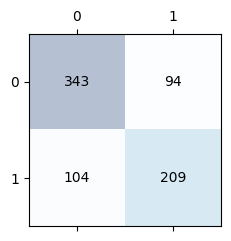

In [105]:
DrawConfusionMatrix(y_test_data_is_partners_decision_positive_without_outliers, prediction)

In [106]:
clf = GridSearchCV(LogisticRegression(), parameters, scoring='accuracy')
gs = clf.fit(x_train_data_is_partners_decision_positive_without_outliers_nrm, y_train_data_is_partners_decision_positive_without_outliers)
print(gs.best_params_)
print(gs.score(x_train_data_is_partners_decision_positive_without_outliers_nrm, y_train_data_is_partners_decision_positive_without_outliers))
print(gs.score(x_test_data_is_partners_decision_positive_without_outliers_nrm, y_test_data_is_partners_decision_positive_without_outliers))
prediction = clf.predict(x_test_data_is_partners_decision_positive_without_outliers_nrm)

C:\Users\pgtar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\pgtar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

{'C': 1000, 'penalty': 'l2'}
0.760235294117647
0.732


C:\Users\pgtar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


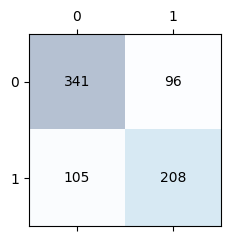

In [107]:
DrawConfusionMatrix(y_test_data_is_partners_decision_positive_without_outliers, prediction)

# With Different Dimensions

(7121, 63)


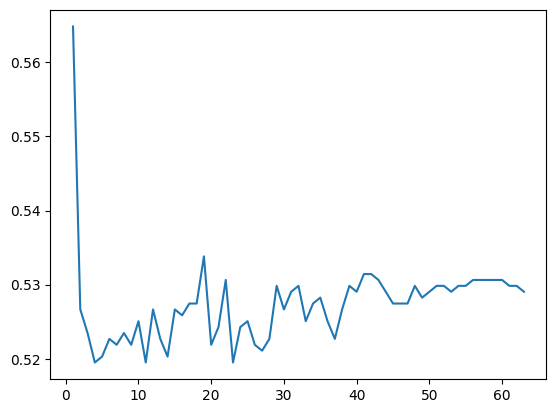

In [95]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
accuracy_scores = []
print(x_train_data_is_match_nrm.shape)
for i in range(1, 64):
    pca = PCA(n_components=i)
    x_train = pca.fit_transform(x_train_data_is_match_std)
    x_test = pca.fit_transform(x_test_data_is_match)
    lr = LogisticRegression(penalty="l2", C=1/10)
    lr.fit(x_train, y_train_data_is_match)
    y_pred = lr.predict(x_test)
    
    cm = confusion_matrix(y_test_data_is_match, y_pred)
    accuracy_scores.append(accuracy_score(y_test_data_is_match, y_pred))

plt.plot(range(1,64), accuracy_scores)

(7121, 63)


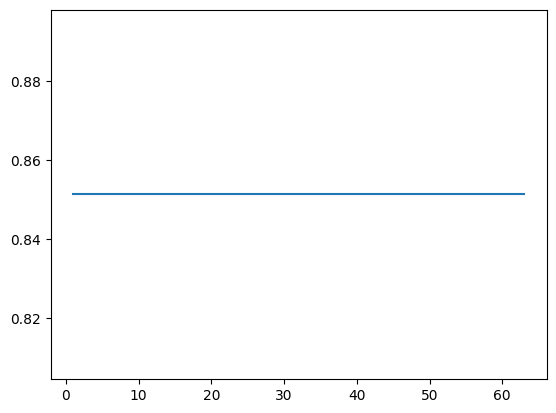

In [97]:
from sklearn.feature_selection import SelectKBest, chi2

accuracy_scores = []
print(x_train_data_is_match_nrm.shape)
for i in range(1, 64):
    x_train = SelectKBest(chi2, k=i).fit_transform(x_train_data_is_match_nrm, y_train_data_is_match)
    x_test = SelectKBest(chi2, k=i).fit_transform(x_test_data_is_match_nrm, y_test_data_is_match)
    lr = LogisticRegression(penalty="l2", C=1/10)
    lr.fit(x_train, y_train_data_is_match)
    y_pred = lr.predict(x_test)
    accuracy_scores.append(accuracy_score(y_test_data_is_match, y_pred))

plt.plot(range(1,64), accuracy_scores)

# KNN

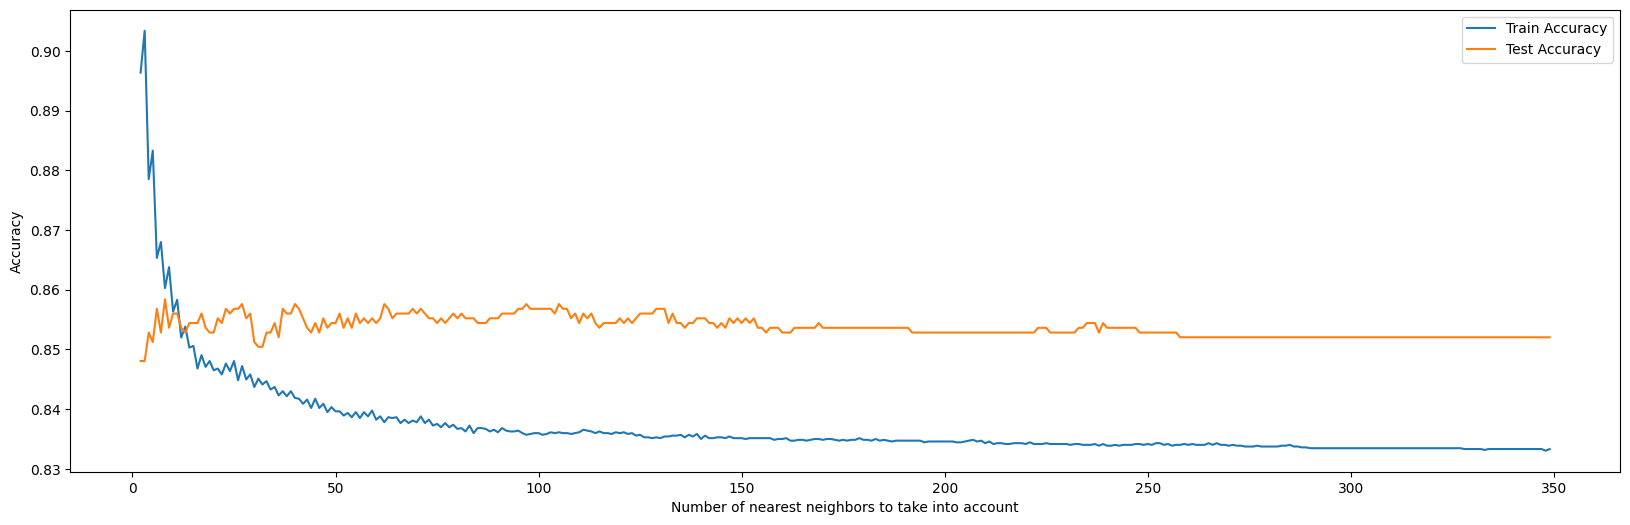

In [225]:
train_accuracy = []
test_accuracy = []
for neighbors_count in  range(2,350,1):
  classifier = KNeighborsClassifier(n_neighbors=neighbors_count)
  classifier.fit(x_train_data_is_match_std, y_train_data_is_match)
  y_test_data_predicted = classifier.predict(x_test_data_is_match_std)
  y_train_data_predicted = classifier.predict(x_train_data_is_match_std)
  train_accuracy.append(accuracy_score(y_train_data_is_match, y_train_data_predicted))
  test_accuracy.append(accuracy_score(y_test_data_is_match, y_test_data_predicted))
figure(num=1, figsize=(20, 6))
plt.ylabel('Accuracy')
plt.xlabel('Number of nearest neighbors to take into account')
plt.plot(range(2,350,1),train_accuracy,label='Train Accuracy')
plt.plot(range(2,350,1),test_accuracy,label='Test Accuracy')
plt.legend()
#plt.show()

In [226]:
#Dimension reduction
from itertools import combinations
from sklearn.base import clone

class SBS():
  def __init__(self, estimator, k_features, 
    scoring=accuracy_score,
    test_size=0.25, random_state=1):
    self.scoring = scoring
    self.estimator = clone(estimator)
    self.k_features = k_features
    self.test_size = test_size
    self.random_state = random_state
  def fit(self, X, y):
    X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=self.test_size,
    random_state=self.random_state)
    dim = X_train.shape[1]
    self.indices_ = tuple(range(dim))
    self.subsets_ = [self.indices_]
    score = self._calc_score(X_train, y_train,
    X_test, y_test, self.indices_)
    self.scores_ = [score]
    while dim > self.k_features:
      scores = []
      subsets = []
      for p in combinations(self.indices_, r=dim - 1):
        score = self._calc_score(X_train, y_train, X_test, y_test, p)
        scores.append(score)
        subsets.append(p)
      best = np.argmax(scores)
      self.indices_ = subsets[best]
      self.subsets_.append(self.indices_)
      dim -= 1
      self.scores_.append(scores[best])
    self.k_score_ = self.scores_[-1]
    return self
  def transform(self, X):
    return X[:, self.indices_]
  def _calc_score(self, X_train, y_train, X_test, y_test, indices):
    self.estimator.fit(X_train[:, indices], y_train)
    y_pred = self.estimator.predict(X_test[:, indices])
    score = self.scoring(y_test, y_pred)
    return score

Text(0, 0.5, 'Accuracy')

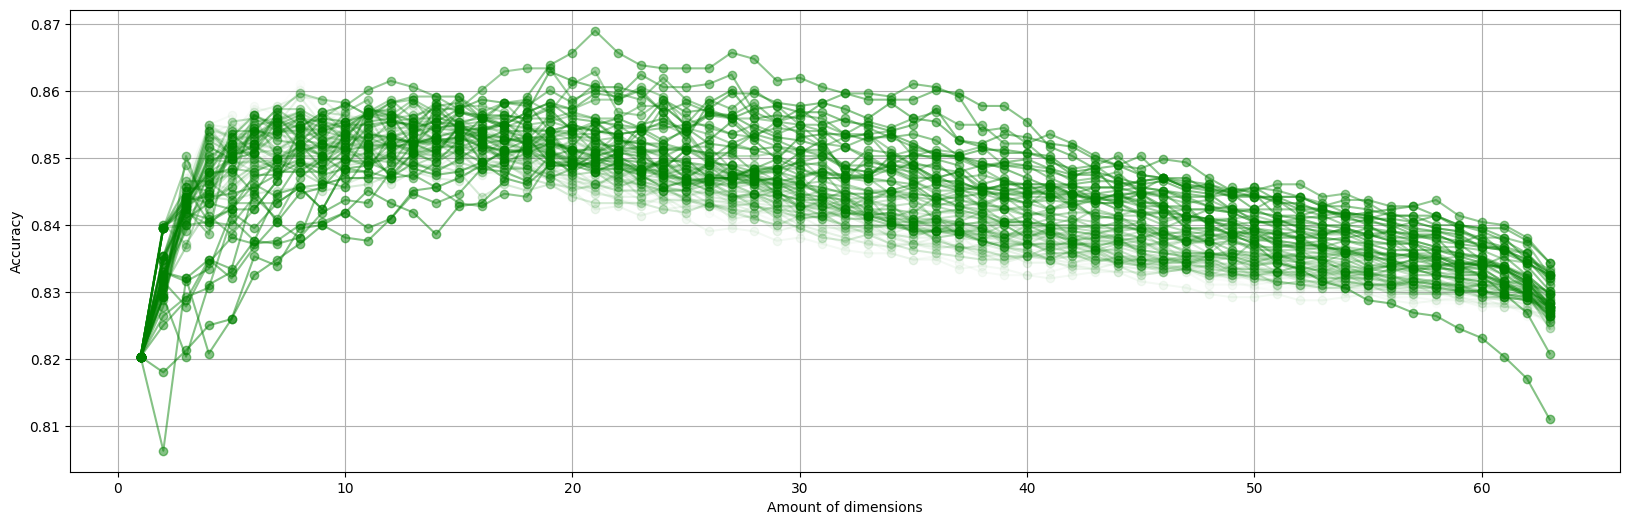

In [227]:
best_neighbors_scores = []
best_neighbors_subsets = []
best_neighbors_count = []
for neighbors_count in range(2,75,1):
  knn = KNeighborsClassifier(n_neighbors=neighbors_count)
  sbs = SBS(knn, k_features=1, test_size=0.30)
  sbs.fit(x_train_data_is_match_std,y_train_data_is_match)
  k_feat = [len(k) for k in sbs.subsets_]
  if(len(best_neighbors_scores)==0):
    best_neighbors_scores.append(sbs.scores_)
    best_neighbors_subsets.append(sbs.subsets_)
    best_neighbors_count.append(neighbors_count)
  if(best_neighbors_scores[0][16]<sbs.scores_[16]):
    best_neighbors_scores.insert(0,sbs.scores_)
    best_neighbors_subsets.insert(0,sbs.subsets_)
    best_neighbors_count.insert(0,neighbors_count)
  figure(num=1, figsize=(20, 6))
  plt.plot(k_feat,sbs.scores_,marker='o', alpha=((75.0-neighbors_count)/75.0)/2.0, color='g')
  plt.grid()
plt.xlabel('Amount of dimensions')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

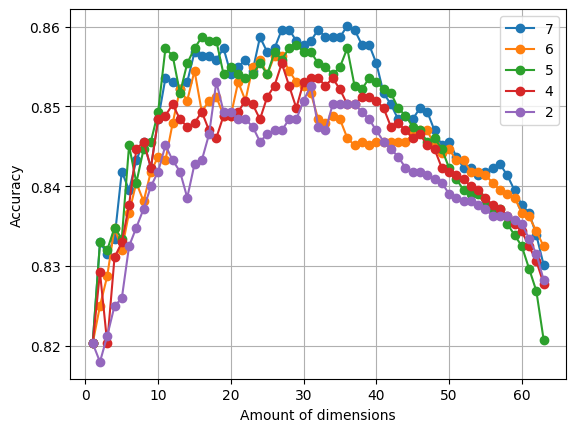

In [230]:
for i in best_neighbors_scores:
  plt.plot(k_feat,i,marker='o')

figure(num=1, figsize=(20, 6))
plt.grid()
plt.legend(best_neighbors_count)
plt.xlabel('Amount of dimensions')
plt.ylabel('Accuracy')

In [231]:
print(best_neighbors_scores[0][63-36])

0.8600842302292934


In [232]:
print(df.columns[0:][list(best_neighbors_subsets[0][63-36])])

Index(['wave', 'age', 'age_o', 'race', 'race_o', 'samerace',
       'importance_same_religion', 'pref_o_intelligence', 'pref_o_funny',
       'pref_o_ambitious', 'pref_o_shared_interests', 'attractive_o',
       'sinsere_o', 'intelligence_o', 'funny_o', 'ambitous_o',
       'shared_interests_o', 'intellicence_important', 'funny_important',
       'shared_interests_important', 'attractive', 'sincere',
       'attractive_partner', 'sincere_partner', 'funny_partner',
       'ambition_partner', 'shared_interests_partner', 'tv', 'movies',
       'concerts', 'shopping', 'yoga', 'interests_correlate',
       'expected_happy_with_sd_people', 'like', 'guess_prob_liked'],
      dtype='object')


In [268]:
subset = df[['wave', 'age', 'age_o', 'race', 'race_o', 'samerace',
       'importance_same_religion', 'pref_o_intelligence', 'pref_o_funny',
       'pref_o_ambitious', 'pref_o_shared_interests', 'attractive_o',
       'sinsere_o', 'intelligence_o', 'funny_o', 'ambitous_o',
       'shared_interests_o', 'intellicence_important', 'funny_important',
       'shared_interests_important', 'attractive', 'sincere',
       'attractive_partner', 'sincere_partner', 'funny_partner',
       'ambition_partner', 'shared_interests_partner', 'tv', 'movies',
       'concerts', 'shopping', 'yoga', 'interests_correlate',
       'expected_happy_with_sd_people', 'like', 'guess_prob_liked']]
x_data_subset = subset.values
x_train_data_is_match_subset, x_test_data_is_match_subset, y_train_data_is_match_subset, y_test_data_is_match_subset = train_test_split(x_data_subset, y_data_is_match, test_size=0.15)
print(x_train_data_is_match_subset.shape)
print(x_test_data_is_match_subset.shape)
scaler = StandardScaler()
scaler.fit(x_train_data_is_match_subset)
x_train_data_is_match_subset_std = scaler.transform(x_train_data_is_match_subset)

scaler.fit(x_test_data_is_match_subset)
x_test_data_is_match_subset_std = scaler.transform(x_test_data_is_match_subset)

knn = KNeighborsClassifier(n_neighbors=36)
knn.fit(x_train_data_is_match_subset_std, y_train_data_is_match_subset)
prediction = knn.predict(x_test_data_is_match_subset)
score = accuracy_score(y_test_data_is_match_subset, prediction)
print(score)

(7121, 36)
(1257, 36)
0.8297533810660302


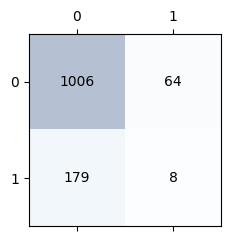

In [269]:
DrawConfusionMatrix(y_test_data_is_match, prediction)

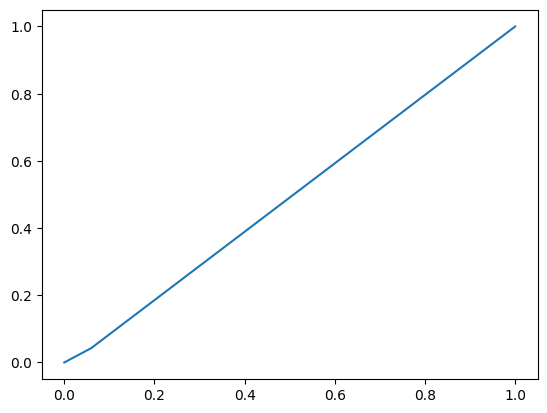

In [270]:
fpr, tpr, _ = roc_curve(y_test_data_is_match,  prediction)
plt.plot(fpr,tpr)

In [ ]:
knn = knn.fit(x_)

# Random Forest

In [210]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    "criterion" : ["entropy", "gini", "log_loss"],
    'bootstrap': [True],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200]
}

clf = RandomForestClassifier(max_depth=10, random_state=666)

grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(x_train_data_is_match_std, y_train_data_is_match)
print(grid_search.best_params_)
print(grid_search.score(x_train_data_is_match_std, y_train_data_is_match))
print(grid_search.score(x_test_data_is_match_std, y_test_data_is_match))


Fitting 3 folds for each of 54 candidates, totalling 162 fits
{'bootstrap': True, 'criterion': 'gini', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
0.9016991995506249
0.8822593476531424


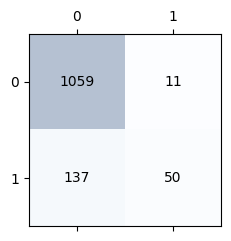

In [211]:
prediction = grid_search.predict(x_test_data_is_match_std)
DrawConfusionMatrix(y_test_data_is_match, prediction)

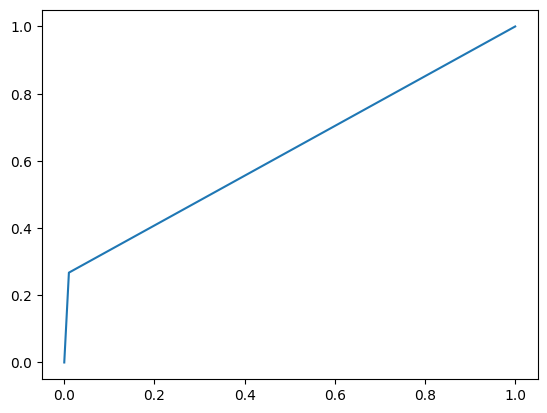

In [212]:
fpr, tpr, _ = roc_curve(y_test_data_is_match,  prediction)
plt.plot(fpr,tpr)

In [175]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    "criterion" : ["entropy", "gini", "log_loss"],
    'bootstrap': [True],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200]
}

clf = RandomForestClassifier(max_depth=10, random_state=666)

grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(x_train_data_is_match_nrm, y_train_data_is_match)
print(grid_search.best_params_)
print(grid_search.score(x_train_data_is_match_nrm, y_train_data_is_match))
print(grid_search.score(x_test_data_is_match_nrm, y_test_data_is_match))


Fitting 3 folds for each of 54 candidates, totalling 162 fits
{'bootstrap': True, 'criterion': 'entropy', 'min_samples_leaf': 5, 'min_samples_split': 12, 'n_estimators': 200}
0.8924308383653982
0.8711217183770883


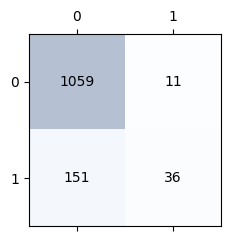

In [176]:
prediction = grid_search.predict(x_test_data_is_match_nrm)
DrawConfusionMatrix(y_test_data_is_match, prediction)

In [177]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    "criterion" : ["entropy", "gini", "log_loss"],
    'bootstrap': [True],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200]
}

clf = RandomForestClassifier(max_depth=10, random_state=666)

grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(x_train_data_is_match_without_outliers_nrm, y_train_data_is_match_without_outliers)
print(grid_search.best_params_)
print(grid_search.score(x_train_data_is_match_without_outliers_nrm, y_train_data_is_match_without_outliers))
print(grid_search.score(x_test_data_is_match_without_outliers_nrm, y_test_data_is_match_without_outliers))


Fitting 3 folds for each of 54 candidates, totalling 162 fits
{'bootstrap': True, 'criterion': 'entropy', 'min_samples_leaf': 5, 'min_samples_split': 12, 'n_estimators': 200}
0.8990588235294118
0.8426666666666667


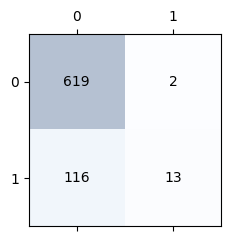

In [178]:
prediction = grid_search.predict(x_test_data_is_match_without_outliers_nrm)
DrawConfusionMatrix(y_test_data_is_match_without_outliers, prediction)

In [186]:
from sklearn.ensemble import RandomForestClassifier

# param_grid = {
#     "criterion" : ["entropy", "gini", "log_loss"],
#     'bootstrap': [True],
#     'min_samples_leaf': [3, 4, 5, 10],
#     'min_samples_split': [4, 8, 10, 12, 22],
#     'n_estimators': [100, 200, 1000],
#     'max_depth': [10, 100, 1000]
# }
param_grid = {
    "criterion" : ["entropy", "gini", "log_loss"],
    'bootstrap': [True],
    'min_samples_leaf': [3],
    'min_samples_split': [4],
    'n_estimators': [1000],
    'max_depth': [10]
}


clf = RandomForestClassifier(random_state=666)

grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(x_train_data_is_my_decision_positive_std, y_train_data_is_my_decision_positive)
print(grid_search.best_params_)
print(grid_search.score(x_train_data_is_my_decision_positive_std, y_train_data_is_my_decision_positive))
print(grid_search.score(x_test_data_is_my_decision_positive_std, y_test_data_is_my_decision_positive))

Fitting 3 folds for each of 3 candidates, totalling 9 fits
{'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 1000}
0.9198146327762955
0.8114558472553699


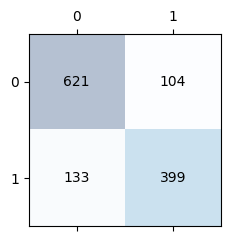

In [196]:
prediction = grid_search.predict(x_test_data_is_my_decision_positive_std)
DrawConfusionMatrix(y_test_data_is_my_decision_positive, prediction)

In [201]:
from sklearn.ensemble import RandomForestClassifier

# param_grid = {
#     "criterion" : ["entropy", "gini", "log_loss"],
#     'bootstrap': [True],
#     'min_samples_leaf': [3, 4, 5, 10],
#     'min_samples_split': [4, 8, 10, 12, 22],
#     'n_estimators': [100, 200, 1000],
#     'max_depth': [10, 100, 1000]
# }
param_grid = {
    "criterion" : ["entropy", "gini", "log_loss"],
    'bootstrap': [True],
    'min_samples_leaf': [3, 10],
    'min_samples_split': [4, 6],
    'n_estimators': [100],
    'max_depth': [12]
}


clf = RandomForestClassifier(random_state=666)

grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(x_train_data_is_partners_decision_positive_std, y_train_data_is_partners_decision_positive)
print(grid_search.best_params_)
print(grid_search.score(x_train_data_is_partners_decision_positive_std, y_train_data_is_partners_decision_positive))
print(grid_search.score(x_test_data_is_partners_decision_positive_std, y_test_data_is_partners_decision_positive))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
{'bootstrap': True, 'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 100}
0.926133969948041
0.7875894988066826


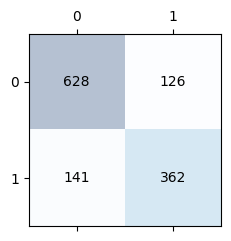

In [202]:
prediction = grid_search.predict(x_test_data_is_partners_decision_positive_std)
DrawConfusionMatrix(y_test_data_is_partners_decision_positive, prediction)

# SVC

In [187]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'kernel': ('linear', 'rbf') , 
              'C':[5, 10, 100]}
clf = SVC()
grid = GridSearchCV(clf, param_grid , refit=True , verbose=3)
grid.fit(x_train_data_is_match_std, y_train_data_is_match)
grid.get_params().keys()

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ................C=5, kernel=linear;, score=0.859 total time=   5.7s
[CV 2/5] END ................C=5, kernel=linear;, score=0.859 total time=   5.4s
[CV 3/5] END ................C=5, kernel=linear;, score=0.849 total time=   5.1s
[CV 4/5] END ................C=5, kernel=linear;, score=0.853 total time=   5.4s
[CV 5/5] END ................C=5, kernel=linear;, score=0.852 total time=   5.1s
[CV 1/5] END ...................C=5, kernel=rbf;, score=0.862 total time=   1.0s
[CV 2/5] END ...................C=5, kernel=rbf;, score=0.861 total time=   1.0s
[CV 3/5] END ...................C=5, kernel=rbf;, score=0.839 total time=   0.9s
[CV 4/5] END ...................C=5, kernel=rbf;, score=0.850 total time=   1.0s
[CV 5/5] END ...................C=5, kernel=rbf;, score=0.860 total time=   1.0s
[CV 1/5] END ...............C=10, kernel=linear;, score=0.859 total time=   9.6s
[CV 2/5] END ...............C=10, kernel=linear;,

dict_keys(['cv', 'error_score', 'estimator__C', 'estimator__break_ties', 'estimator__cache_size', 'estimator__class_weight', 'estimator__coef0', 'estimator__decision_function_shape', 'estimator__degree', 'estimator__gamma', 'estimator__kernel', 'estimator__max_iter', 'estimator__probability', 'estimator__random_state', 'estimator__shrinking', 'estimator__tol', 'estimator__verbose', 'estimator', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

In [193]:
grid.best_params_
print(grid.score(x_train_data_is_match_std, y_train_data_is_match))
print(grid.score(x_test_data_is_match_std, y_test_data_is_match))

0.8567616907737677
0.8671439936356404


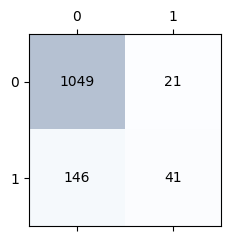

In [205]:
prediction = grid.predict(x_test_data_is_match_std)
DrawConfusionMatrix(y_test_data_is_match, prediction)

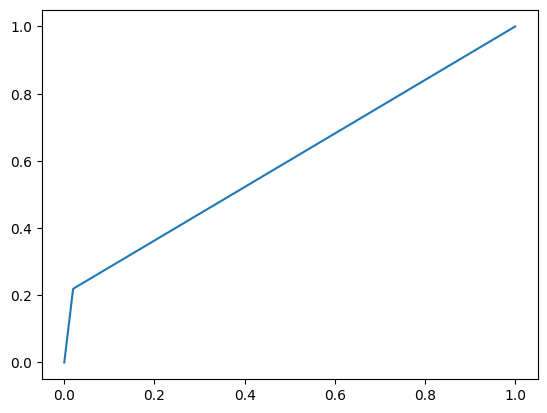

In [209]:
fpr, tpr, _ = roc_curve(y_test_data_is_match,  prediction)
plt.plot(fpr,tpr)

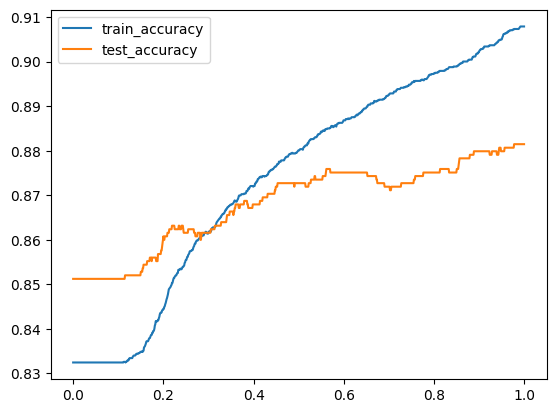

In [214]:
train_hist = []
test_hist = []

r = np.arange(0.0001,1,0.001)
for i in r:
  
  svc_clf = SVC(C=i, random_state=1)
  svc_clf.fit(x_train_data_is_match_std, y_train_data_is_match)
  train_hist.append(svc_clf.score(x_train_data_is_match_std, y_train_data_is_match))
  test_hist.append(svc_clf.score(x_test_data_is_match_std, y_test_data_is_match))

plt.plot(r, train_hist, label='train_accuracy')
plt.plot(r, test_hist, label='test_accuracy')
plt.legend()

# MLP

In [219]:
hidden_layer_sizes=[(20),(20,14),(20,14,8),(20,14,8,4)]
#activation function
activation_function=['relu','logistic']
#backpropagation algorithm
solver=['lbfgs','sgd']
#regularization power - the smaller the stronger regularization
L2=[0.0001,0.001,0.01]
#maximum number of epochs - iteration stops when convergence limit is met (default tol is 1e-4)
max_iter=[200,500,1000]

param_grid=[
  {
    'hidden_layer_sizes': hidden_layer_sizes,
    'activation': activation_function,
    'solver': solver,
    'alpha': L2,
    'max_iter': max_iter
  }
]

mlp_std = GridSearchCV(estimator=MLPClassifier(random_state=random.randint(0,10)),
            param_grid=param_grid,
            scoring='accuracy')

mlp_std = mlp_std.fit(x_train_data_is_match_std, y_train_data_is_match)

C:\Users\pgtar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\pgtar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\pgtar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptr

Train Accuracy:
0.8873753686280017
Test Accuracy:
0.8647573587907716
{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': 20, 'max_iter': 500, 'solver': 'sgd'}


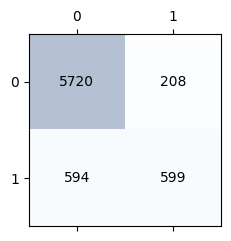

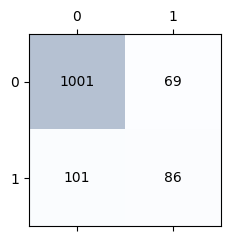

In [220]:
print('Train Accuracy:')
y_train_data_predicted = mlp_std.predict(x_train_data_is_match_std)
train_score = accuracy_score(y_train_data_is_match, y_train_data_predicted)
print(train_score)
DrawConfusionMatrix(y_train_data_is_match, y_train_data_predicted)
print('Test Accuracy:')
y_test_data_predicted = mlp_std.predict(x_test_data_is_match_std)
test_score = accuracy_score(y_test_data_is_match, y_test_data_predicted)
print(test_score)
DrawConfusionMatrix(y_test_data_is_match,y_test_data_predicted)
print(mlp_std.best_params_)

In [221]:
mlp_std = GridSearchCV(estimator=MLPClassifier(random_state=random.randint(0,10)),
            param_grid=param_grid,
            scoring='accuracy')

mlp_std = mlp_std.fit(x_train_data_is_my_decision_positive_std, y_train_data_is_my_decision_positive)

C:\Users\pgtar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\pgtar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\pgtar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptr

Train Accuracy:
0.8674343491082713
Test Accuracy:
0.8154335719968179
{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': 20, 'max_iter': 500, 'solver': 'sgd'}


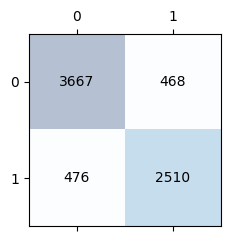

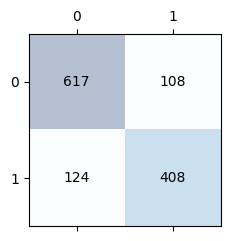

In [222]:
print('Train Accuracy:')
y_train_data_predicted = mlp_std.predict(x_train_data_is_my_decision_positive_std)
train_score = accuracy_score(y_train_data_is_my_decision_positive, y_train_data_predicted)
print(train_score)
DrawConfusionMatrix(y_train_data_is_my_decision_positive, y_train_data_predicted)
print('Test Accuracy:')
y_test_data_predicted = mlp_std.predict(x_test_data_is_my_decision_positive_std)
test_score = accuracy_score(y_test_data_is_my_decision_positive, y_test_data_predicted)
print(test_score)
DrawConfusionMatrix(y_test_data_is_my_decision_positive, y_test_data_predicted)
print(mlp_std.best_params_)

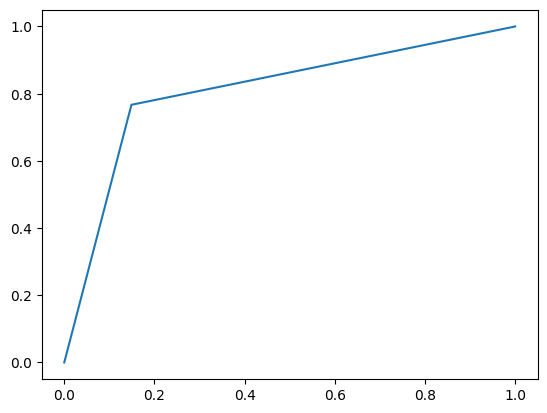

In [223]:
fpr, tpr, _ = roc_curve(y_test_data_is_my_decision_positive,  y_test_data_predicted)
plt.plot(fpr,tpr)